## Naver Boost Course - 파이썬으로 데이터사이언스 시작

건강검진 데이터로 가설을 세우고, 검증해보자

### 가설 세우기
1) 음주 여부는 건강검진 수치와 차이가 있을까?

2) 신장 또는 허리둘레의 크기가 체중과 상관 관계가 있을까?


### 라이브러리 로드

In [157]:
import pandas as pd #데이터분석용
import numpy as np #수치 계산 라이브러리
import seaborn as sns #시각화 라이브러리
import matplotlib.pyplot as plt #그래프 스타일 설정
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'
plt.rc("axes", unicode_minus=False) #마이너스 폰트 깨지는 문제 대처
sns.set(font_scale=1.5, font="AppleGothic")

### 한글폰트 설정

In [158]:
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

### 데이터 로드 및 데이터 확인
- 공공데이터 포털: 건강검진 데이터
[https://www.data.go.kr/dataset/15007122/fileData.do]

In [159]:
df=pd.read_csv("NHIS_OPEN_GJ_2017.csv",encoding='cp949')

In [160]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0   1.0         1      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0   0.0         1      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0   0.0         0      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0   0.0         1      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0   0.0         1      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  2.0  20181126  
2           NaN  NaN  20181126  
3           NaN  0.0  20181126  
4           NaN  0.0  20181126  

[5 rows x 34 columns]

In [9]:
df.shape

(1000000, 34)

### 데이터 기본정보 확인

In [17]:
#결측치 확인
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               599477
데이터공개일자               0
dtype: int64

<AxesSubplot:>

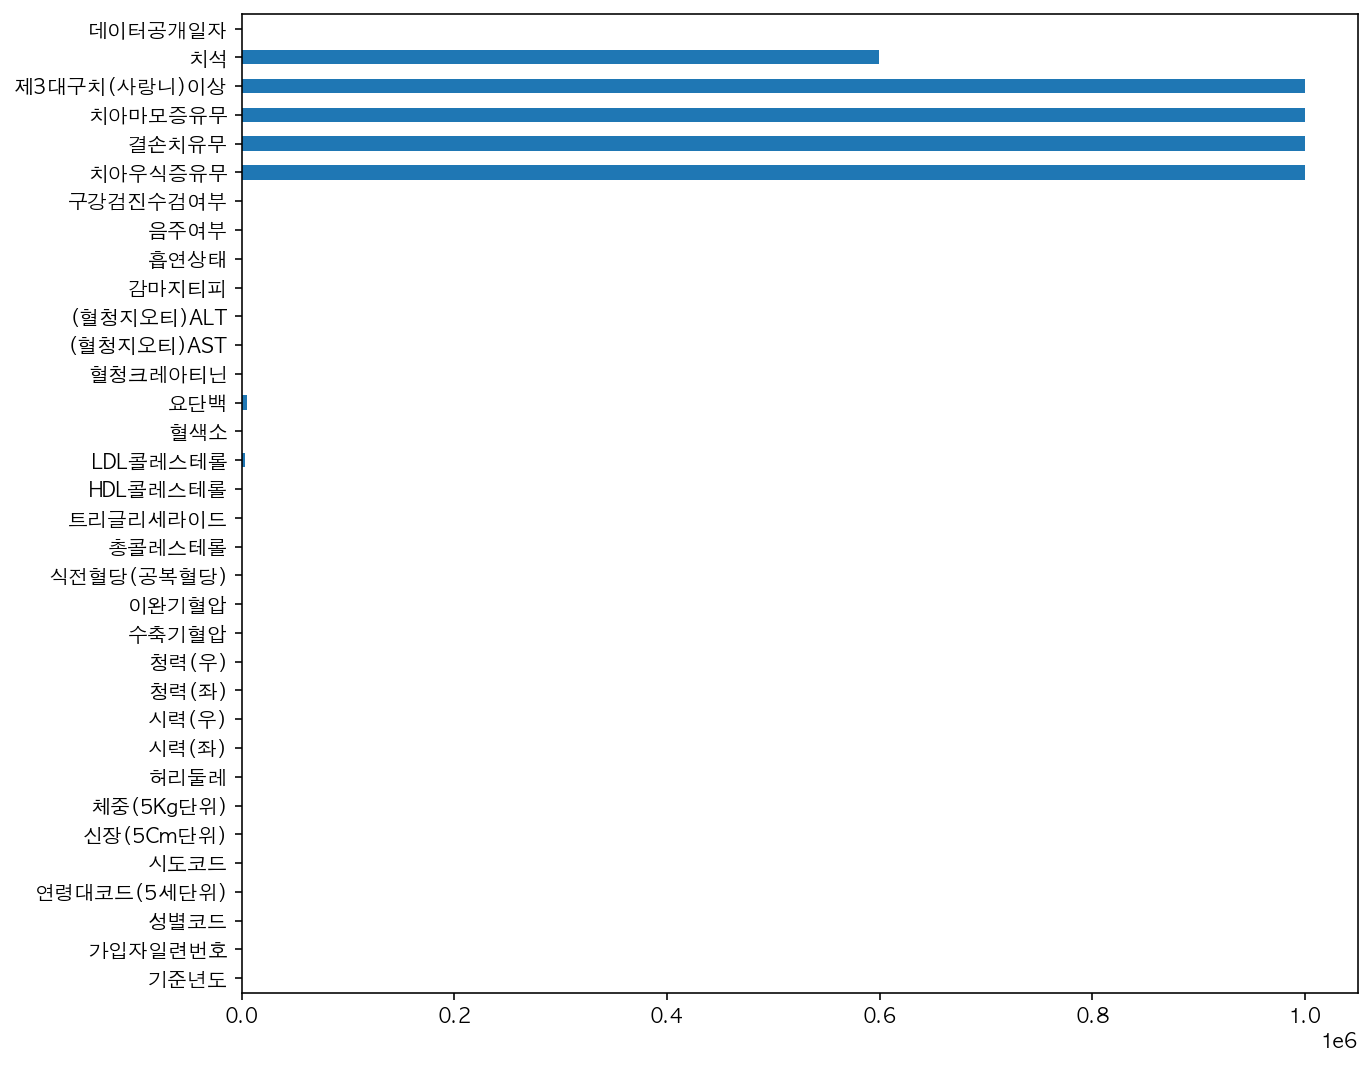

In [21]:
df.isnull().sum().plot.barh(figsize=(10,9))

In [19]:
# 컬럼 및 데이터 타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [25]:
# 특정 컬럼 요약값 보기
df[['신장(5Cm단위)','체중(5Kg단위)','허리둘레']].describe()

신장(5Cm단위)       체중(5Kg단위)           허리둘레
count  1000000.00000  1000000.000000  999734.000000
mean       162.22823       63.268710      81.231603
std          9.28462       12.520732      11.837625
min        130.00000       25.000000       8.000000
25%        155.00000       55.000000      74.100000
50%        160.00000       60.000000      81.000000
75%        170.00000       70.000000      87.800000
max        190.00000      140.000000     999.000000

In [26]:
# 성별
df['성별코드'].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [28]:
#흡연 상태
# 1-흡연 안함, 2-흡연 함, 3-흡연 후 금연
df['흡연상태'].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

## groupby & pivot_table로 값 집계

In [29]:
df.groupby(['성별코드']).mean()

기준년도        가입자일련번호  연령대코드(5세단위)       시도코드   신장(5Cm단위)  체중(5Kg단위)  \
성별코드                                                                         
1     2017.0  499656.610053    10.308458  34.098773  168.537858  70.120963   
2     2017.0  500388.929624    10.773935  33.238046  155.101397  55.528972   

           허리둘레     시력(좌)     시력(우)     청력(좌)  ...      감마지티피      흡연상태  \
성별코드                                           ...                        
1     85.079026  1.036886  1.035752  1.032173  ...  49.445130  2.062924   
2     76.883707  0.916758  0.912829  1.031174  ...  23.335241  1.093455   

          음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  제3대구치(사랑니)이상        치석  \
성별코드                                                                        
1     0.672553  0.435324      NaN    NaN      NaN           NaN  0.639805   
2     0.303534  0.361215      NaN    NaN      NaN           NaN  0.550845   

         데이터공개일자  
성별코드              
1     20181126.0  
2     20181126.0  

[2 rows x 33 columns]

In [33]:
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356587
2     0.0     326827
      1.0     142438
Name: 가입자일련번호, dtype: int64

In [35]:
# 음주여부 컬럼으로 올려주기
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count().unstack(level=1)

음주여부     0.0     1.0
성별코드                
1     173612  356587
2     326827  142438

In [36]:
# pivot_table 사용하기
df.pivot_table(index=['성별코드'],columns='음주여부',values='가입자일련번호',aggfunc='count')

음주여부     0.0     1.0
성별코드                
1     173612  356587
2     326827  142438

### 히스토그램

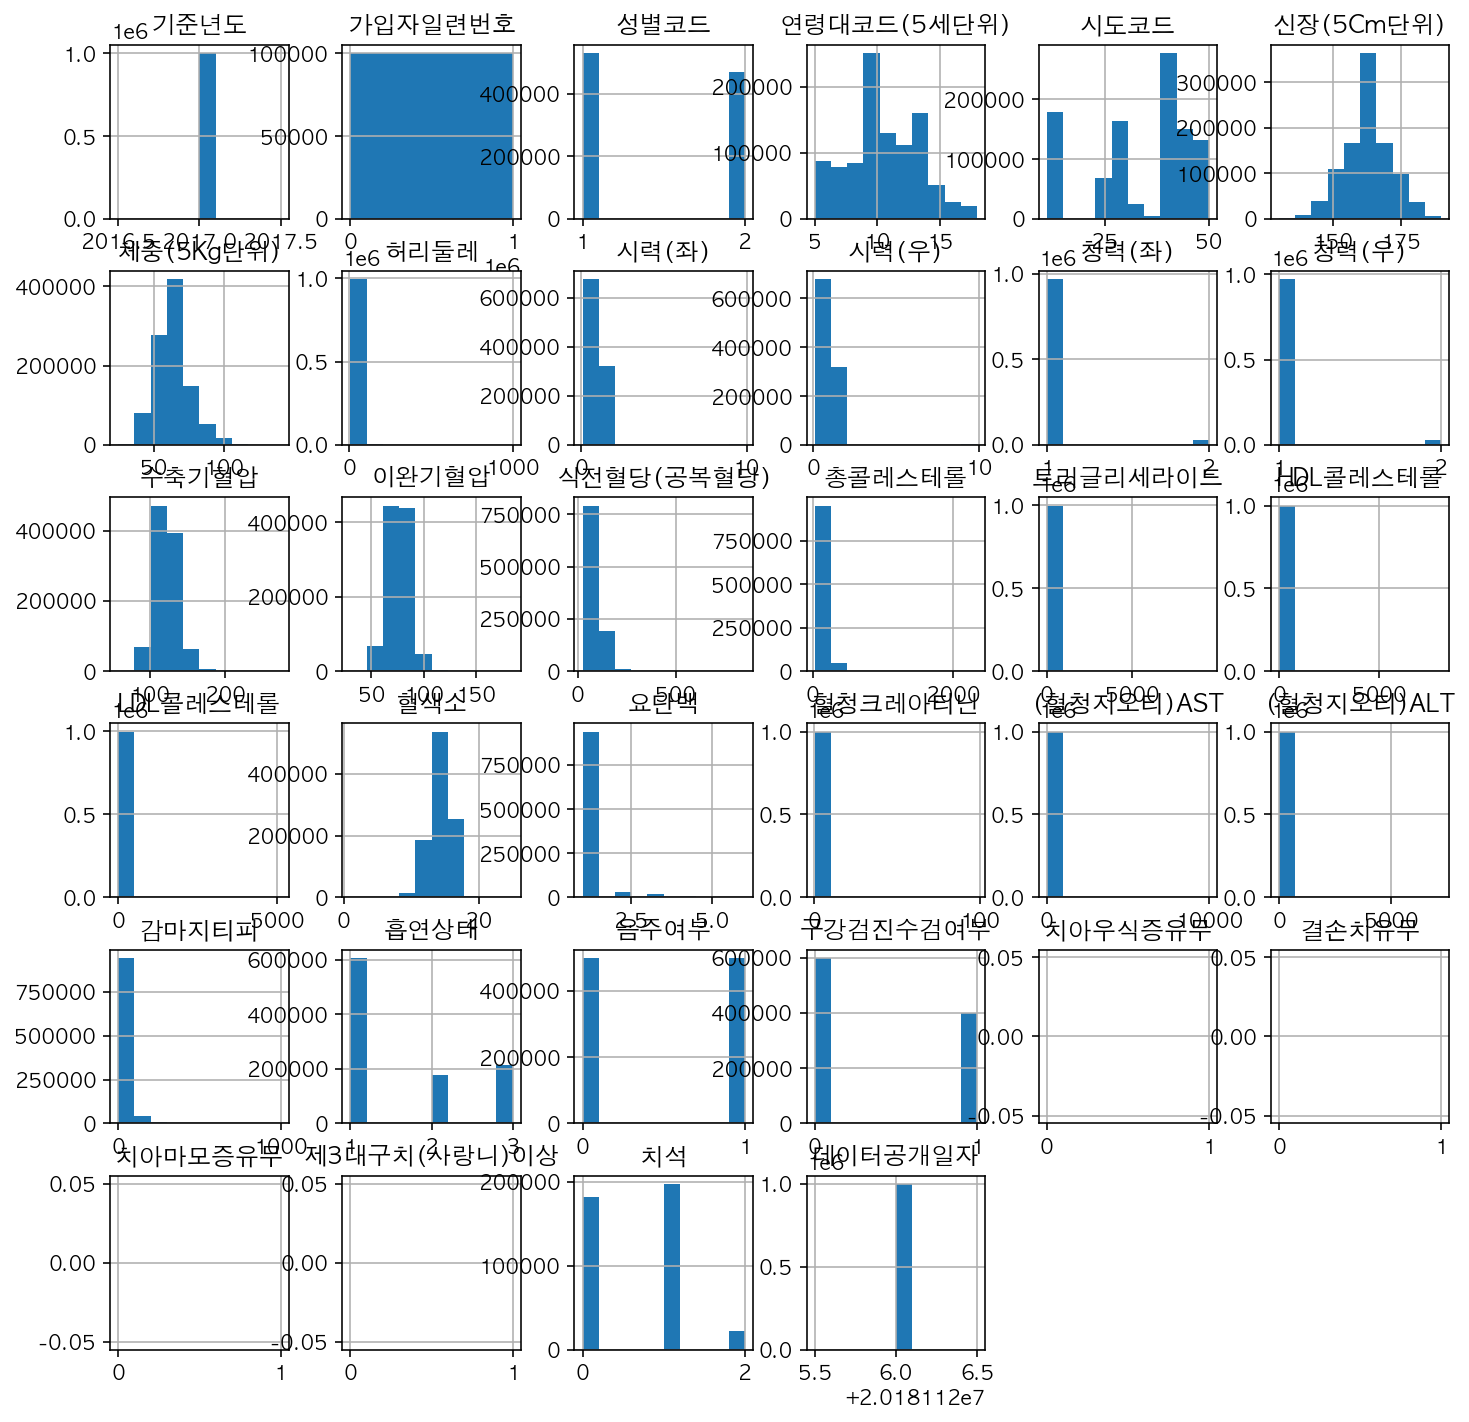

In [40]:
h=df.hist(figsize=(12,12))

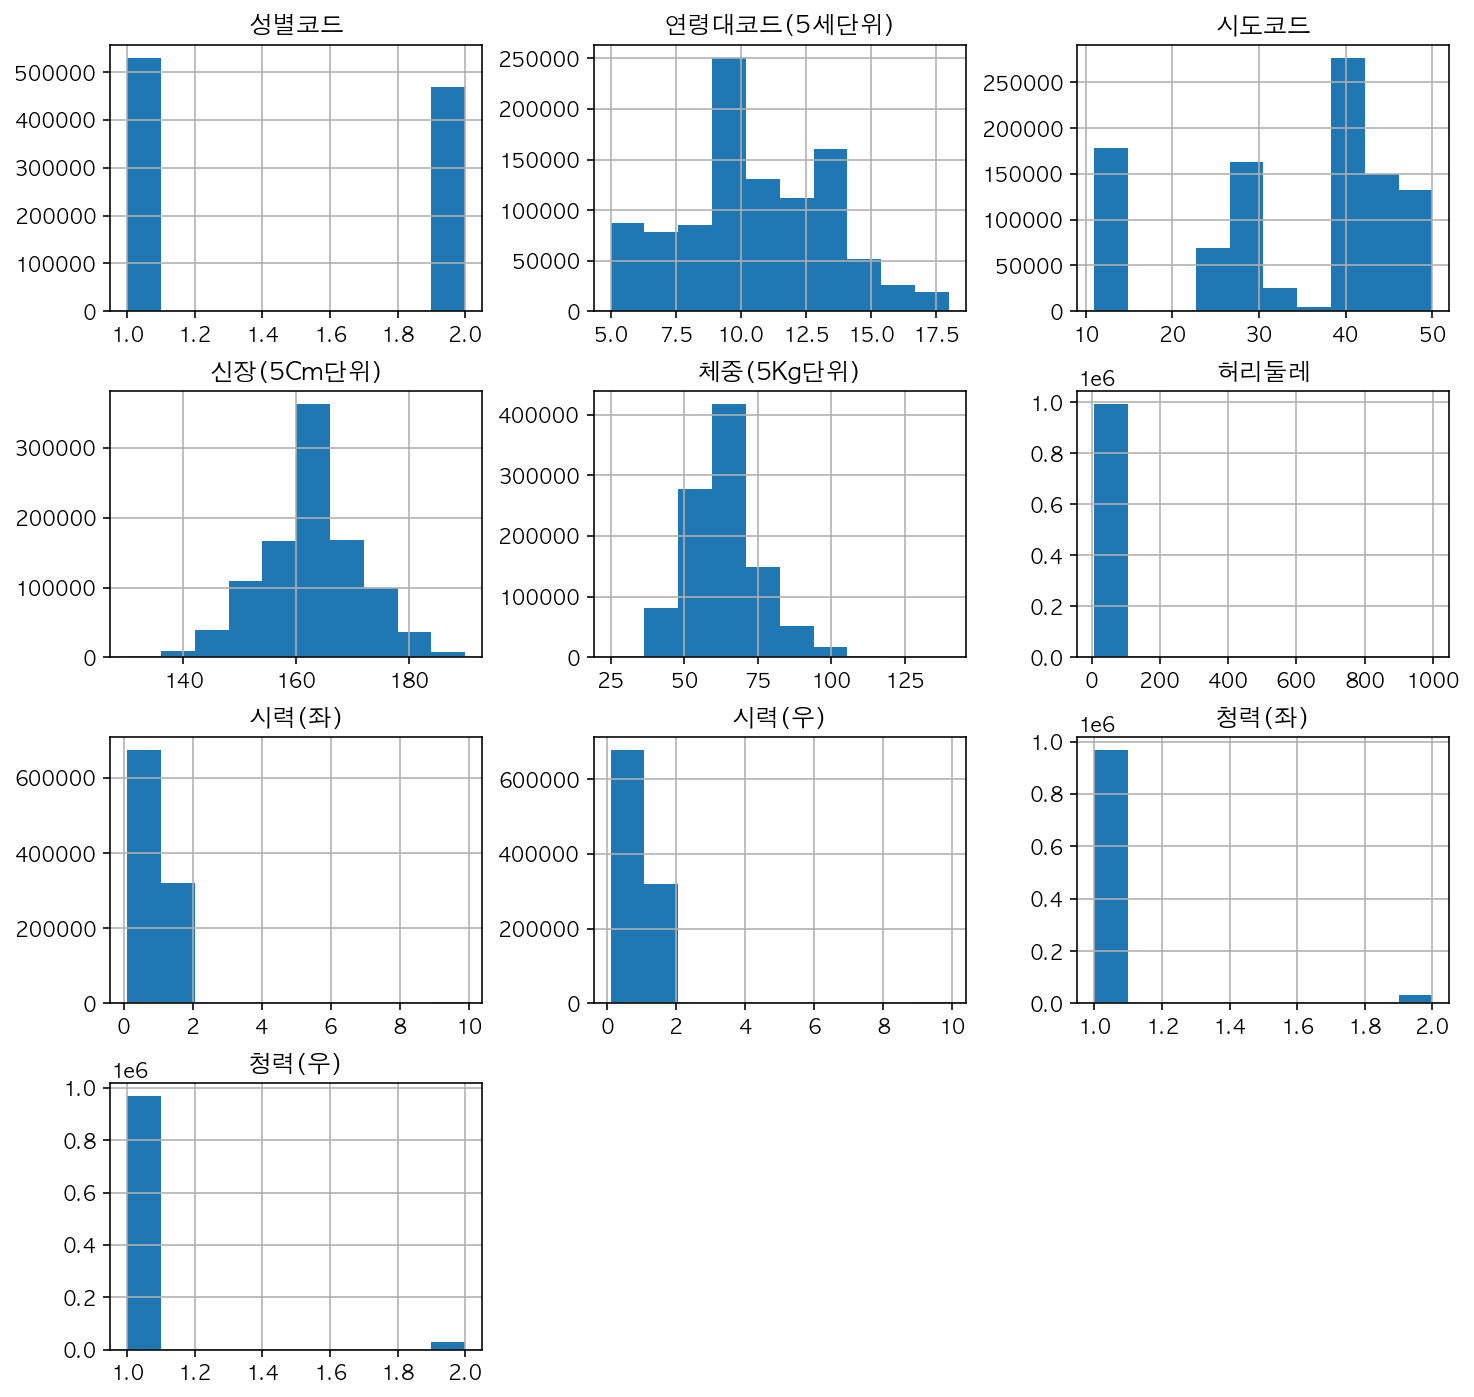

In [46]:
h=df.iloc[ : , 2:12 ].hist(figsize=(12,12))

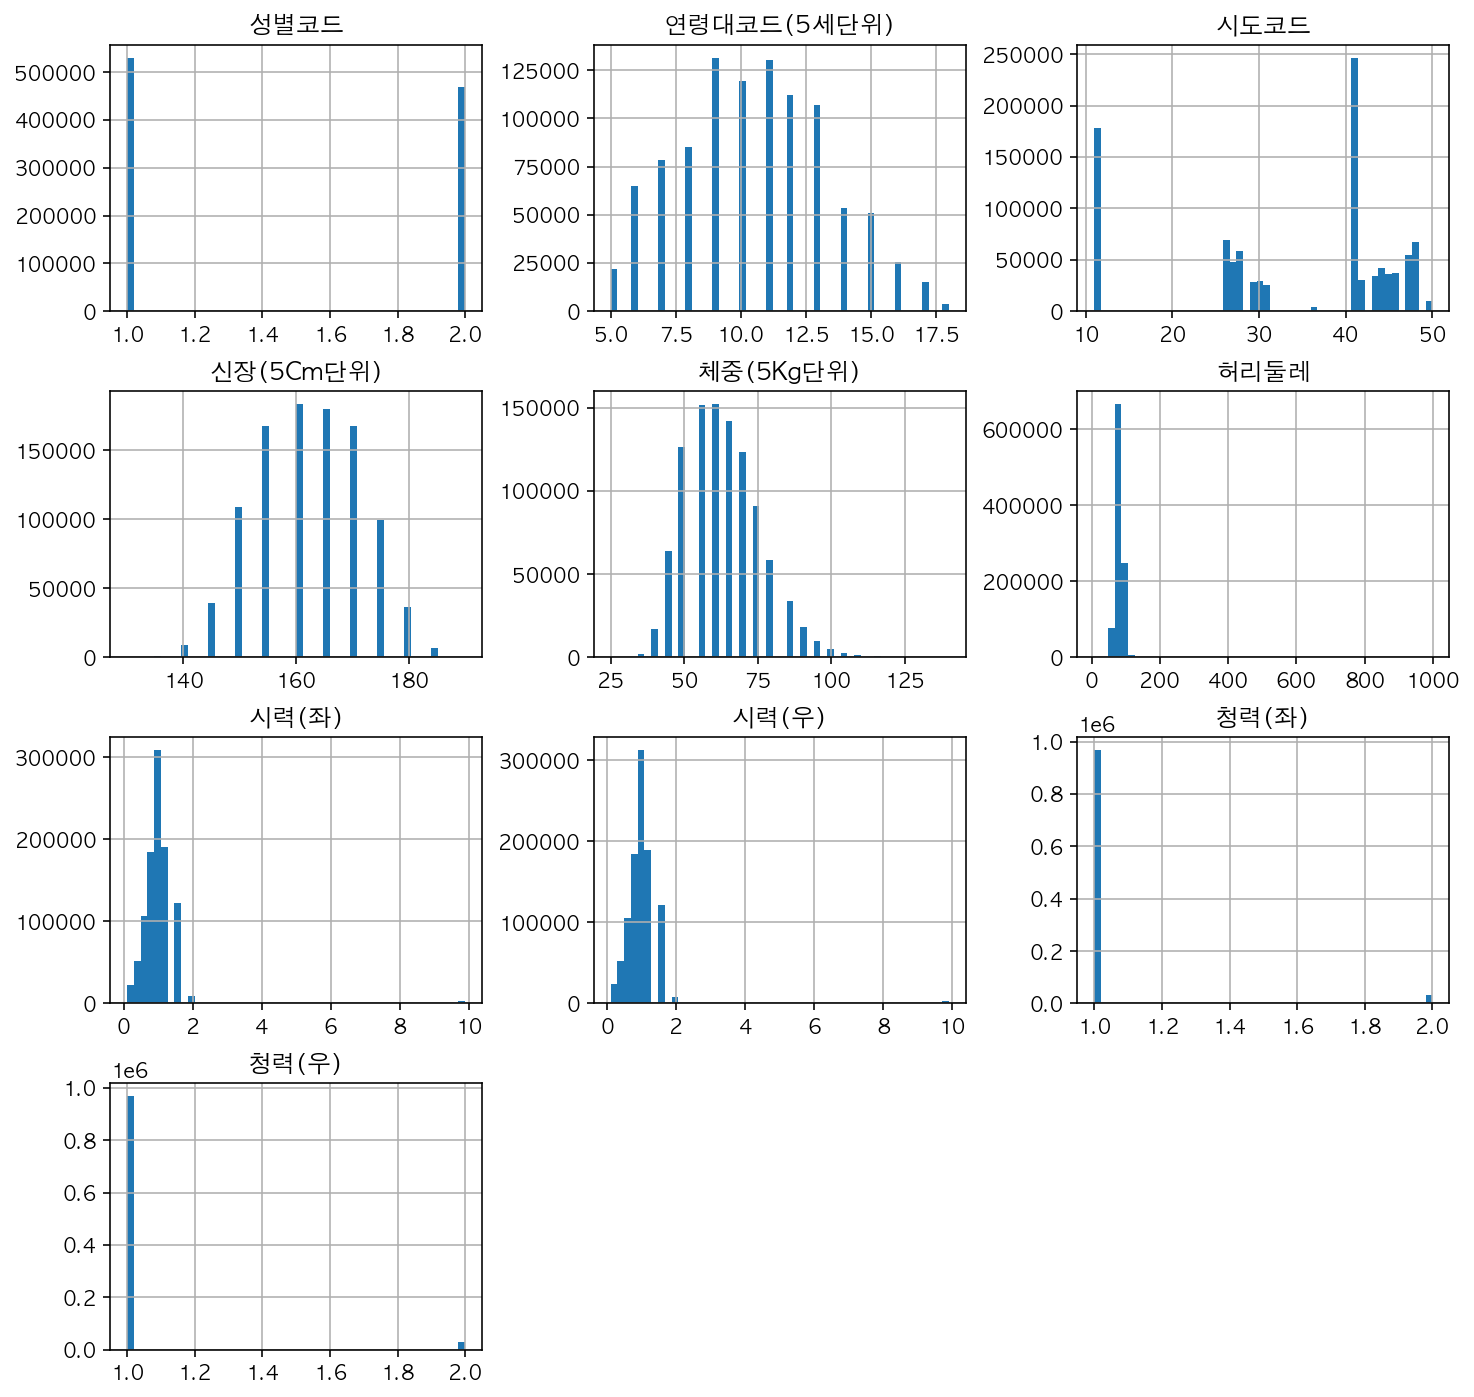

In [57]:
h=df.iloc[ : , 2:12 ].hist(figsize=(12,12),bins=50)

### Seaborn 실습

In [161]:
df_sample=df.sample(1000,random_state=1)

<AxesSubplot:>

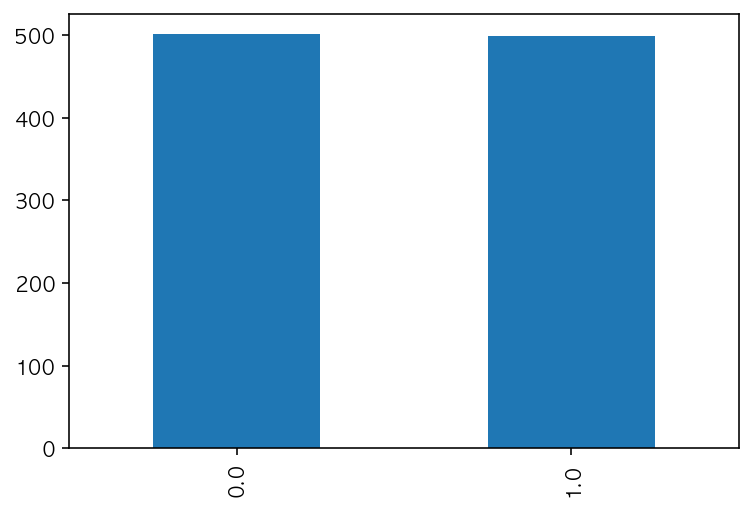

In [62]:
df_sample['음주여부'].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

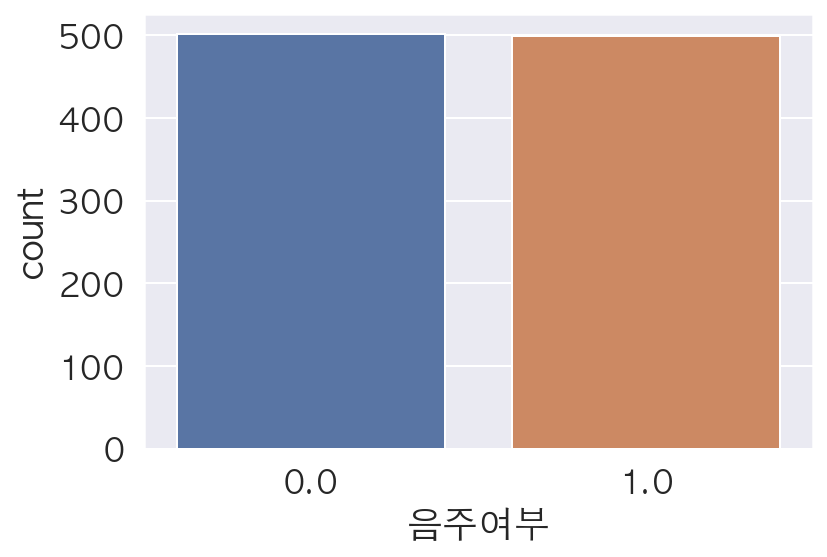

In [69]:
sns.countplot(data=df_sample,x='음주여부')

<AxesSubplot:xlabel='음주여부', ylabel='count'>

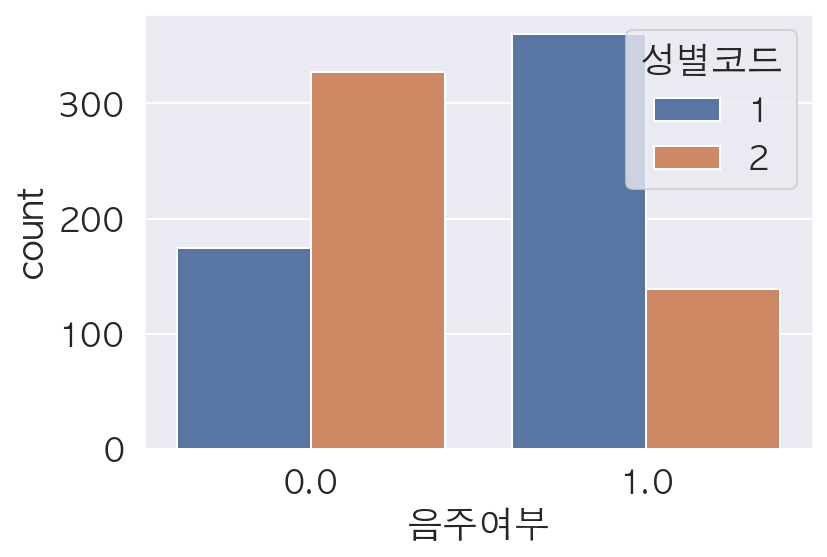

In [68]:
sns.countplot(data=df_sample,x='음주여부',hue='성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

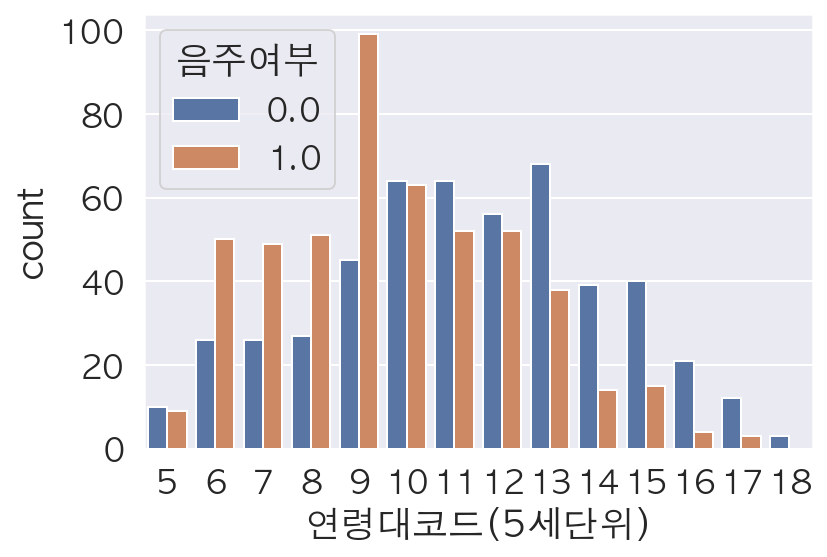

In [70]:
sns.countplot(data=df_sample, x='연령대코드(5세단위)',hue='음주여부')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

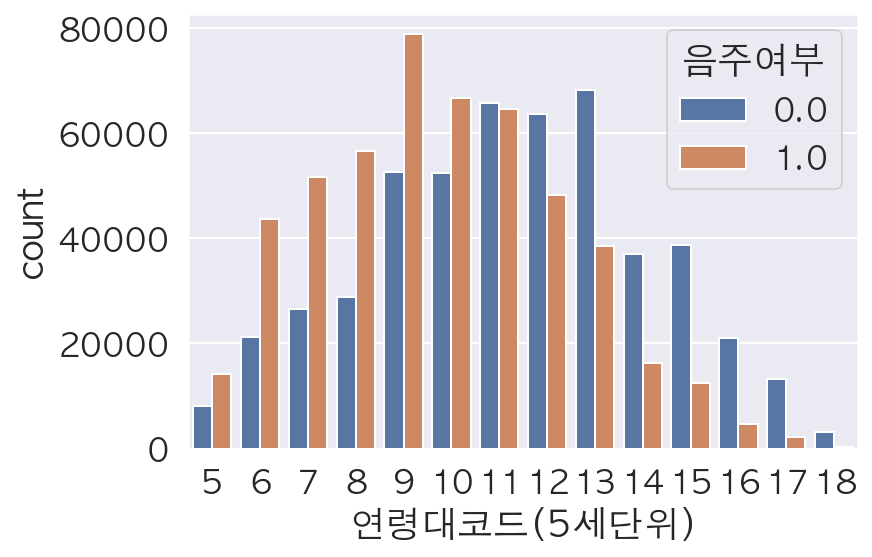

In [71]:
sns.countplot(data=df, x='연령대코드(5세단위)',hue='음주여부')

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

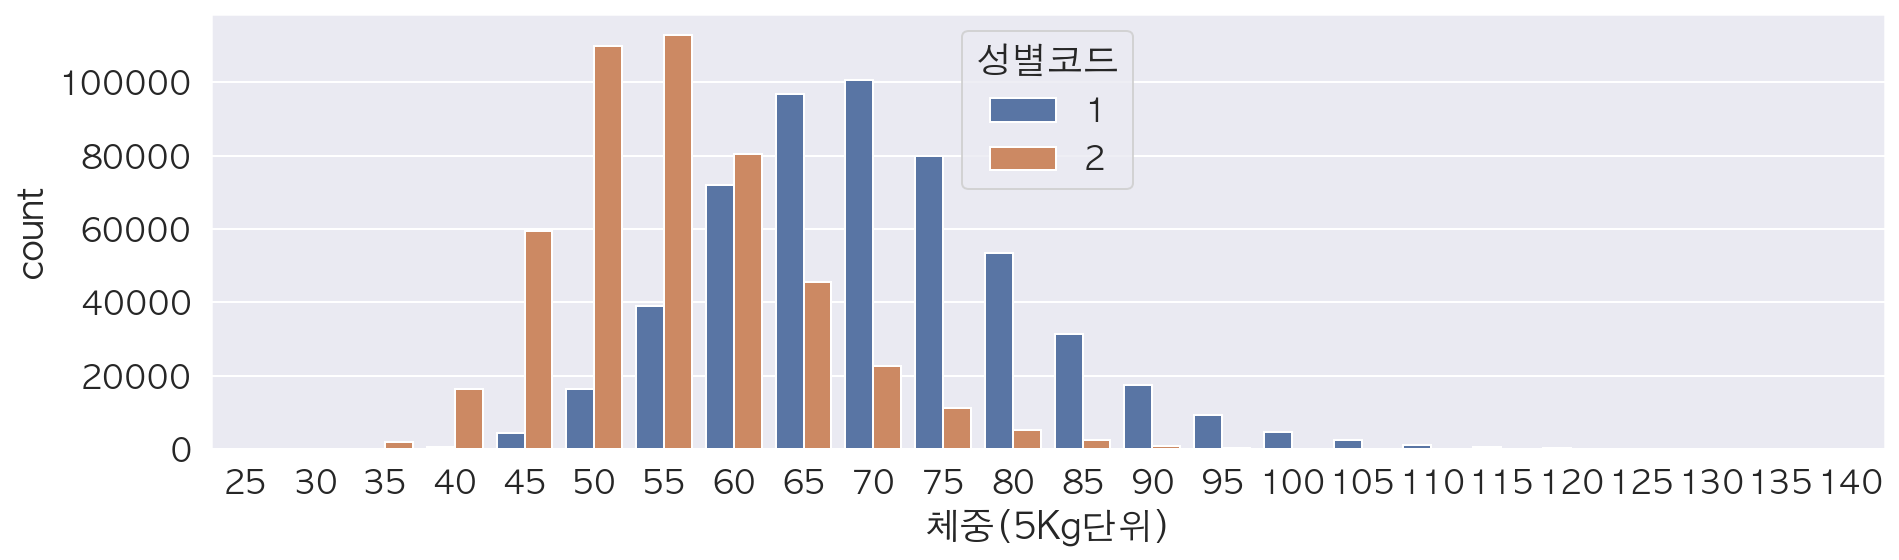

In [76]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

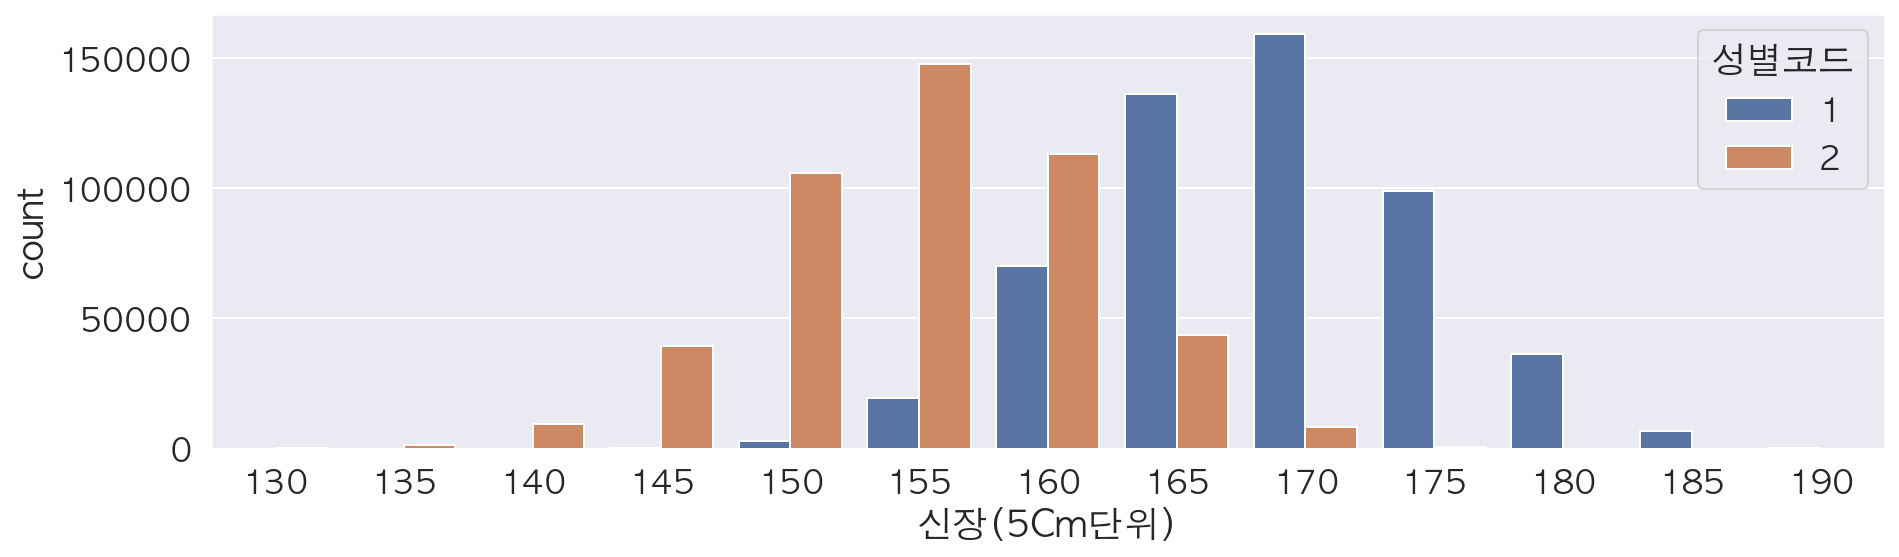

In [77]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

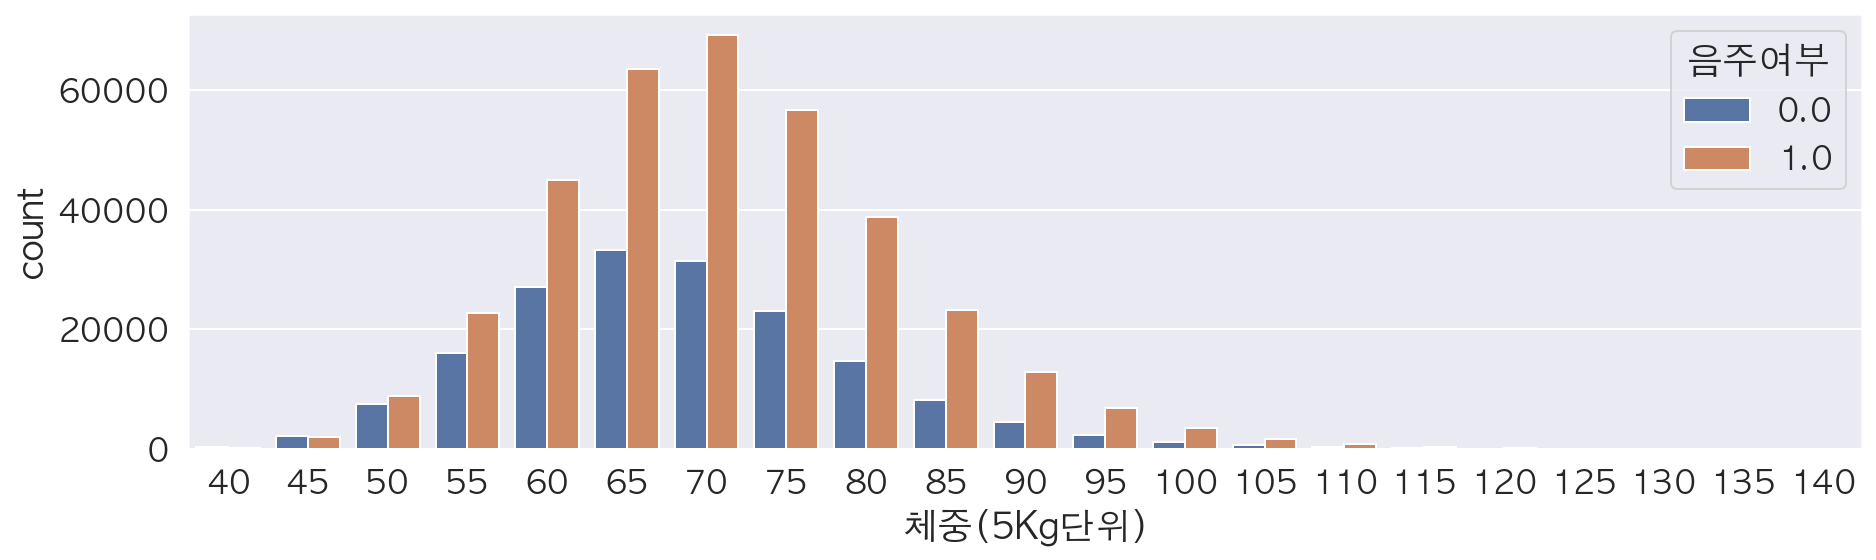

In [80]:
plt.figure(figsize=(15,4))
sns.countplot(data=df[df['성별코드'] == 1], x="체중(5Kg단위)", hue="음주여부")

<AxesSubplot:xlabel='체중(5Kg단위)', ylabel='count'>

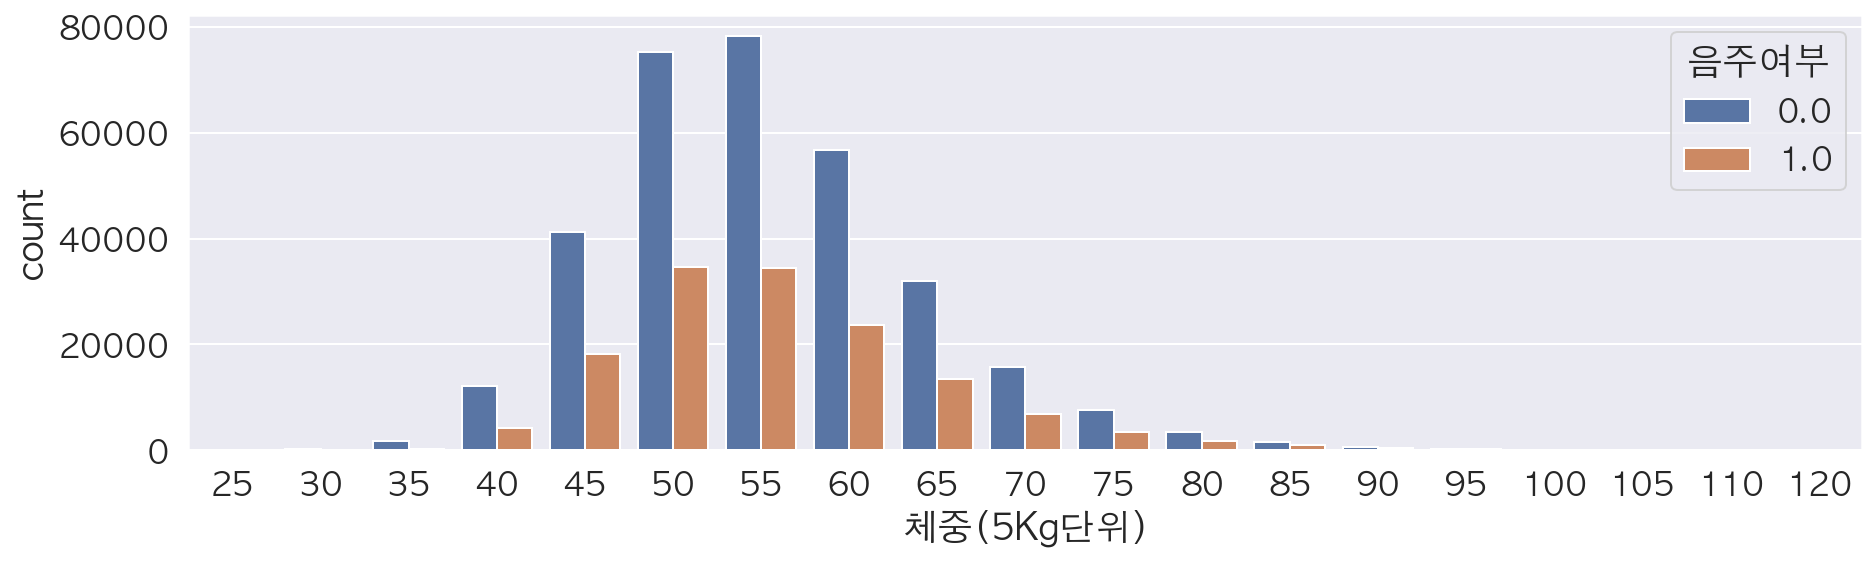

In [81]:
plt.figure(figsize=(15,4))

sns.countplot(data=df[df['성별코드'] == 2], x="체중(5Kg단위)", hue="음주여부")

## 범주형 데이터 시각화
### barplot 

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

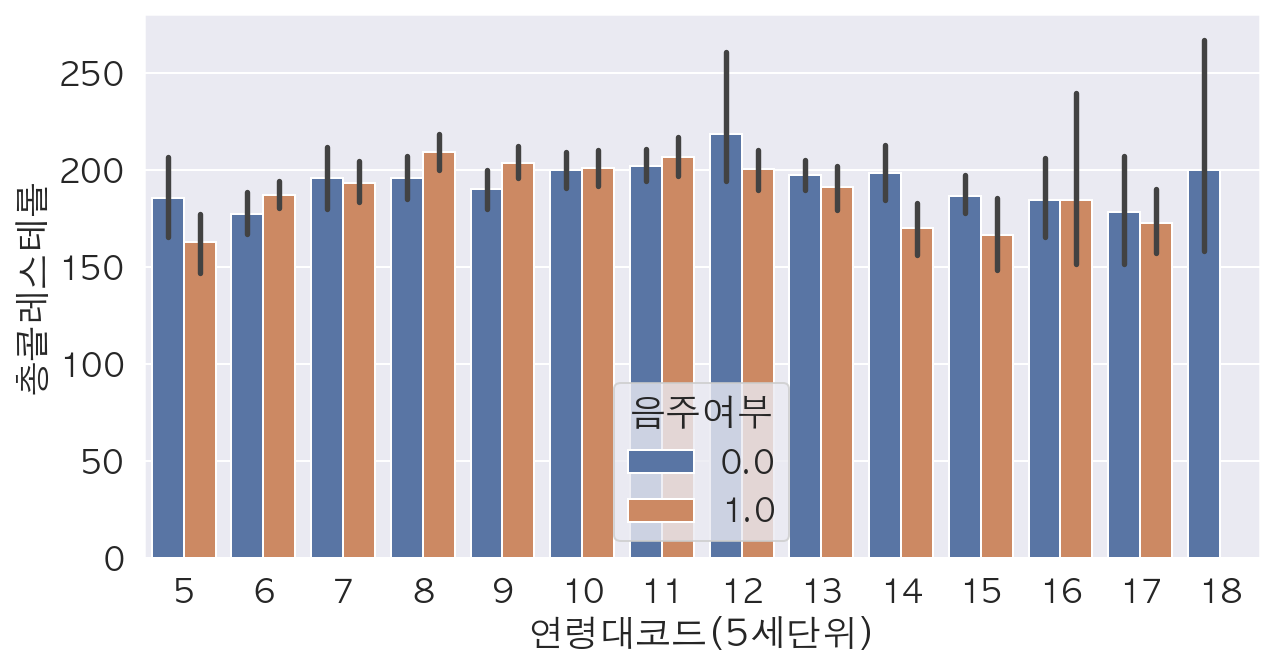

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sample, x ='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

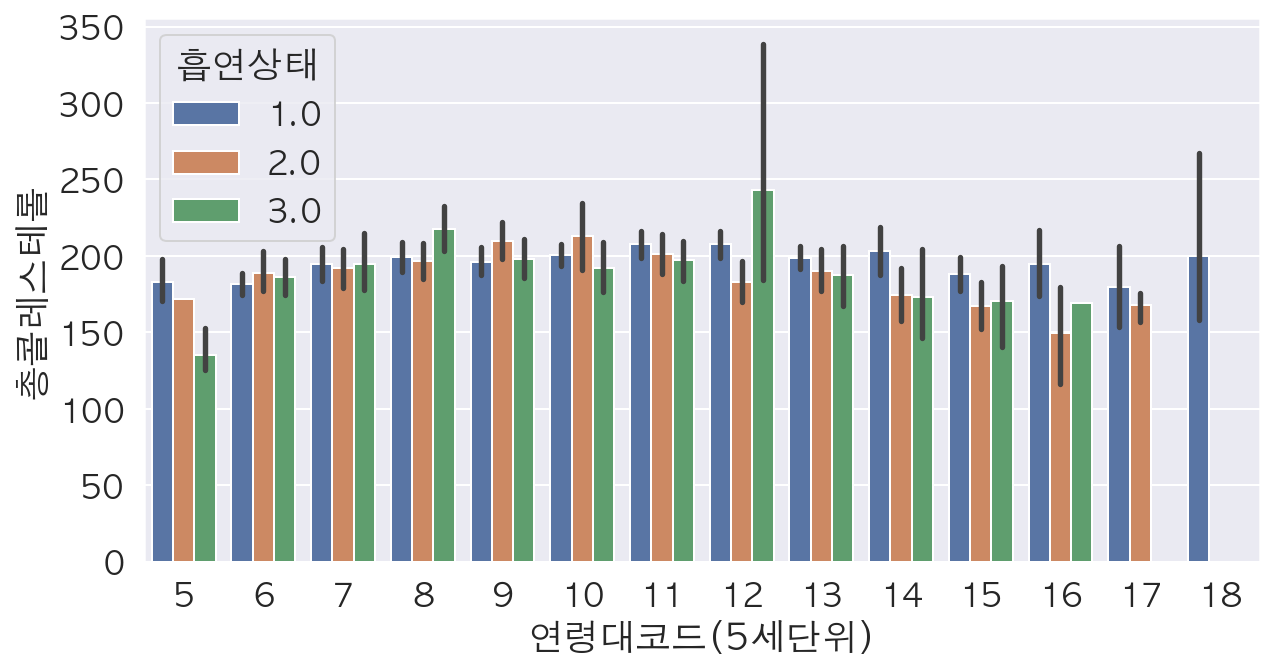

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sample, x ='연령대코드(5세단위)', y='총콜레스테롤', hue='흡연상태')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

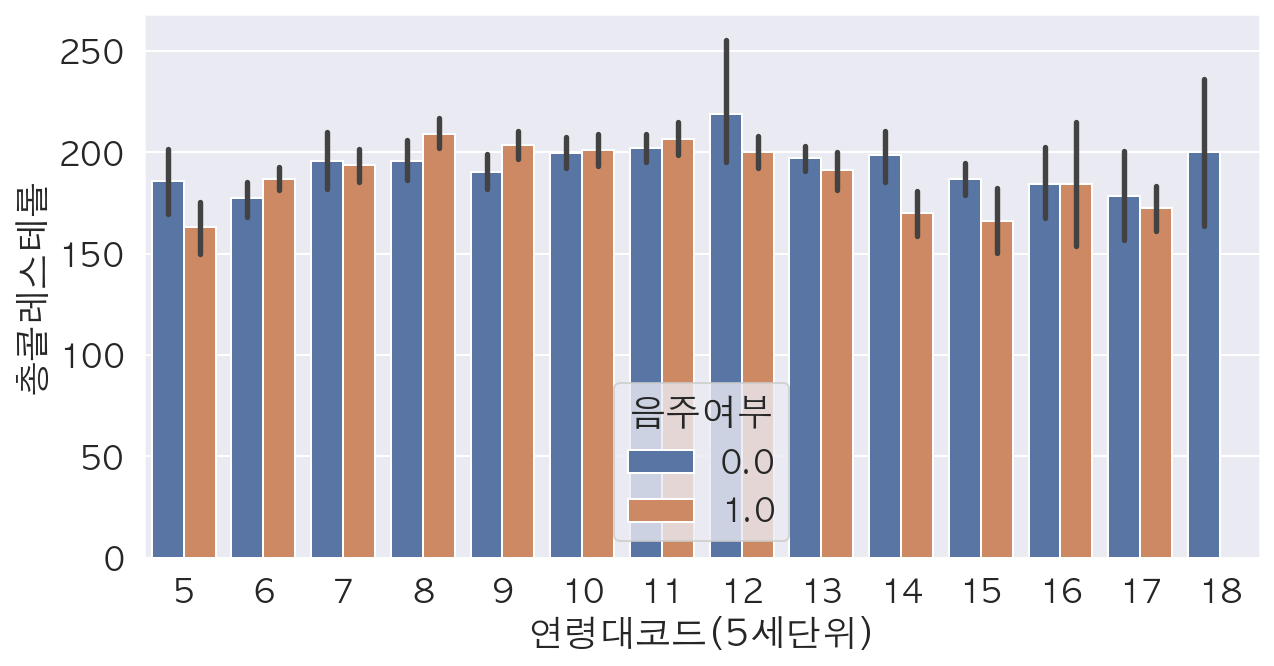

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sample, x ='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부', ci=90)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

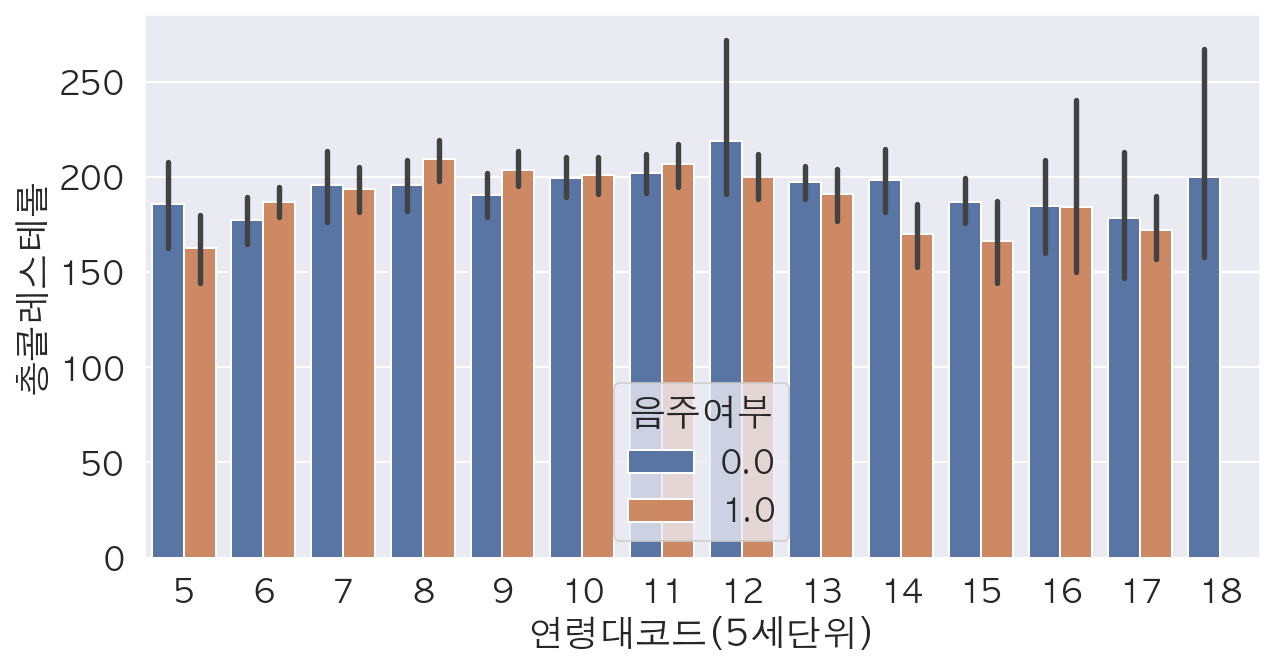

In [91]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sample, x ='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부', ci=98)

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sample, x ='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부', ci='sd')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

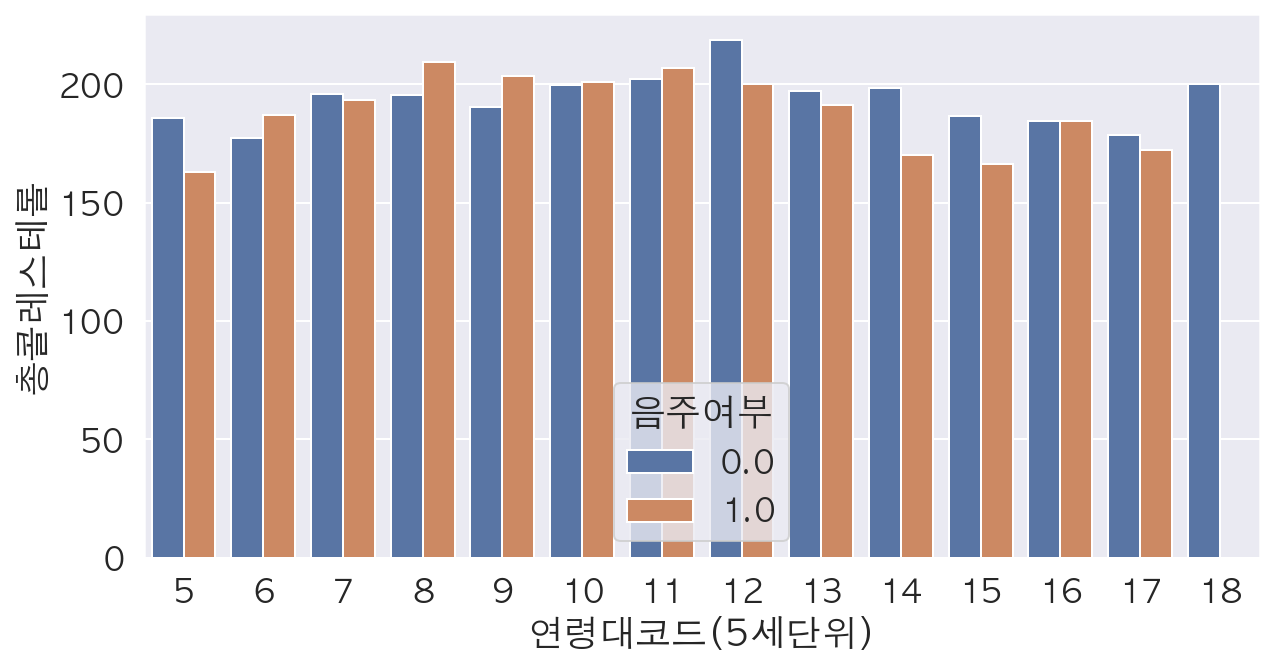

In [94]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sample, x ='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부', ci=None)

### line plot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

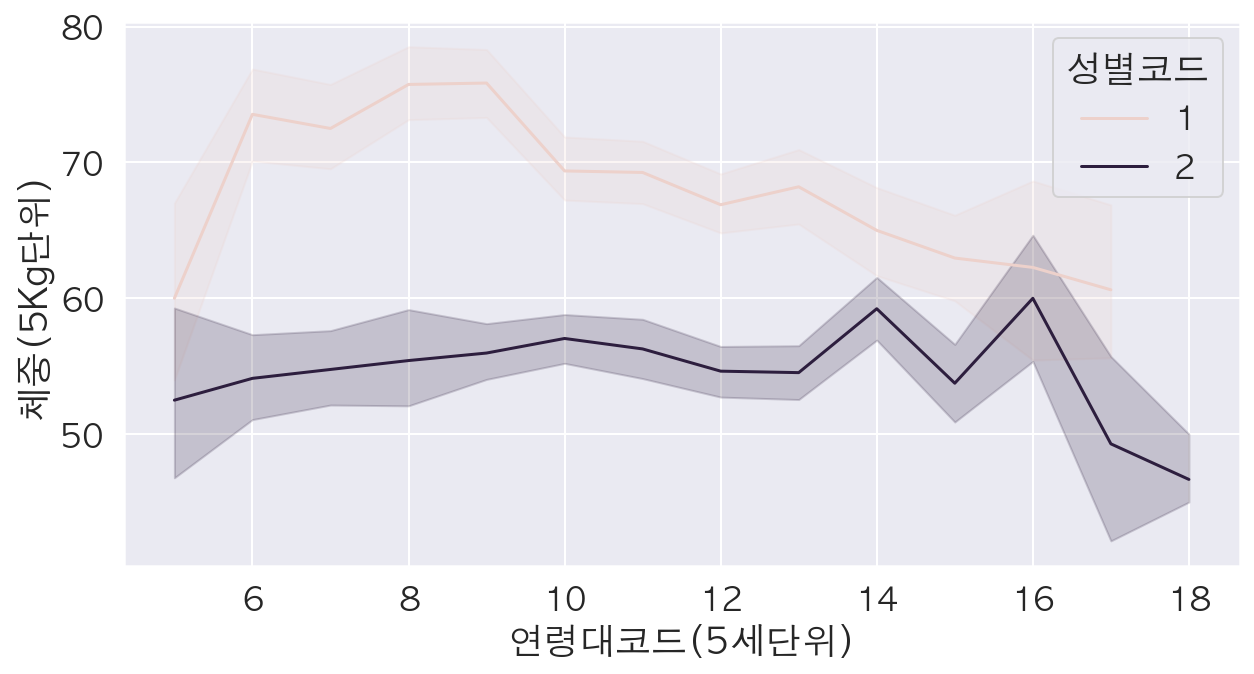

In [95]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

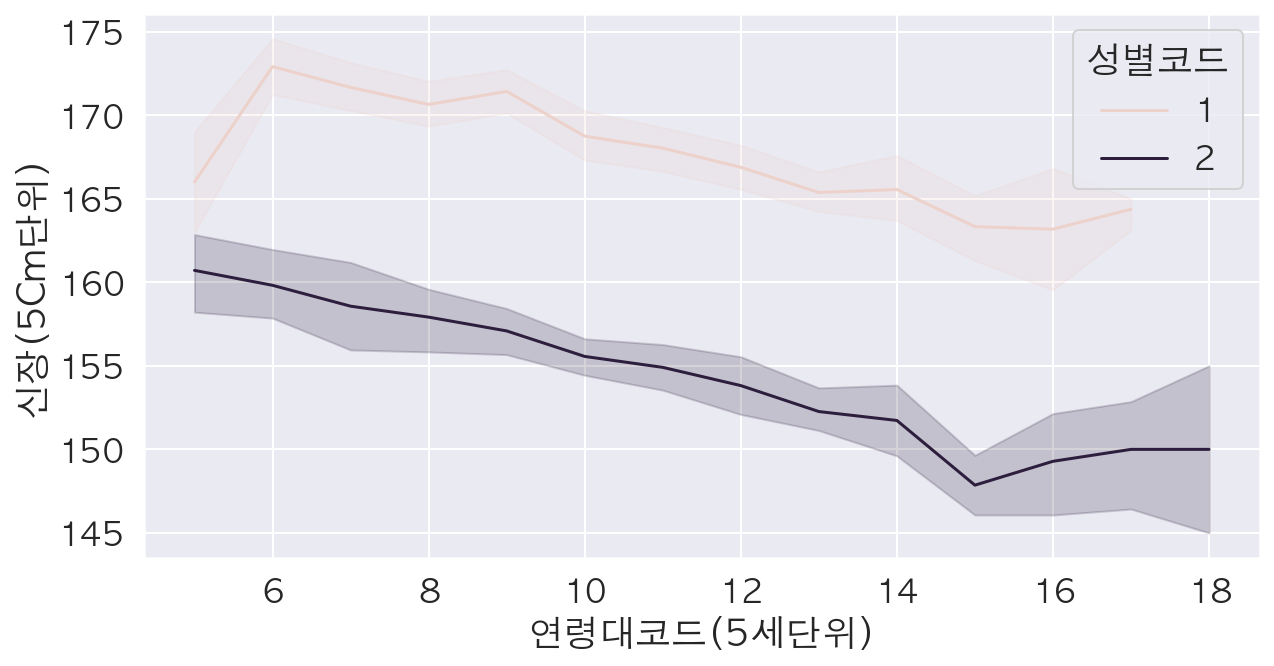

In [100]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', ci=95)

### PointPlot

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

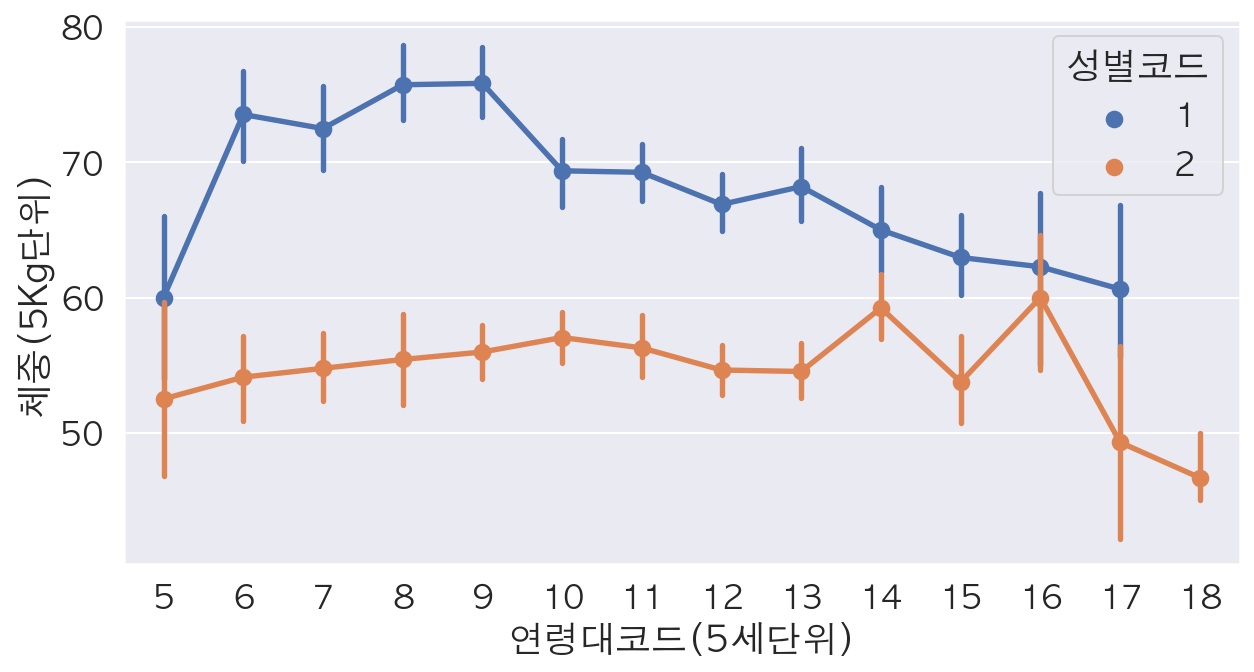

In [102]:
plt.figure(figsize=(10,5))
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', ci=95)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

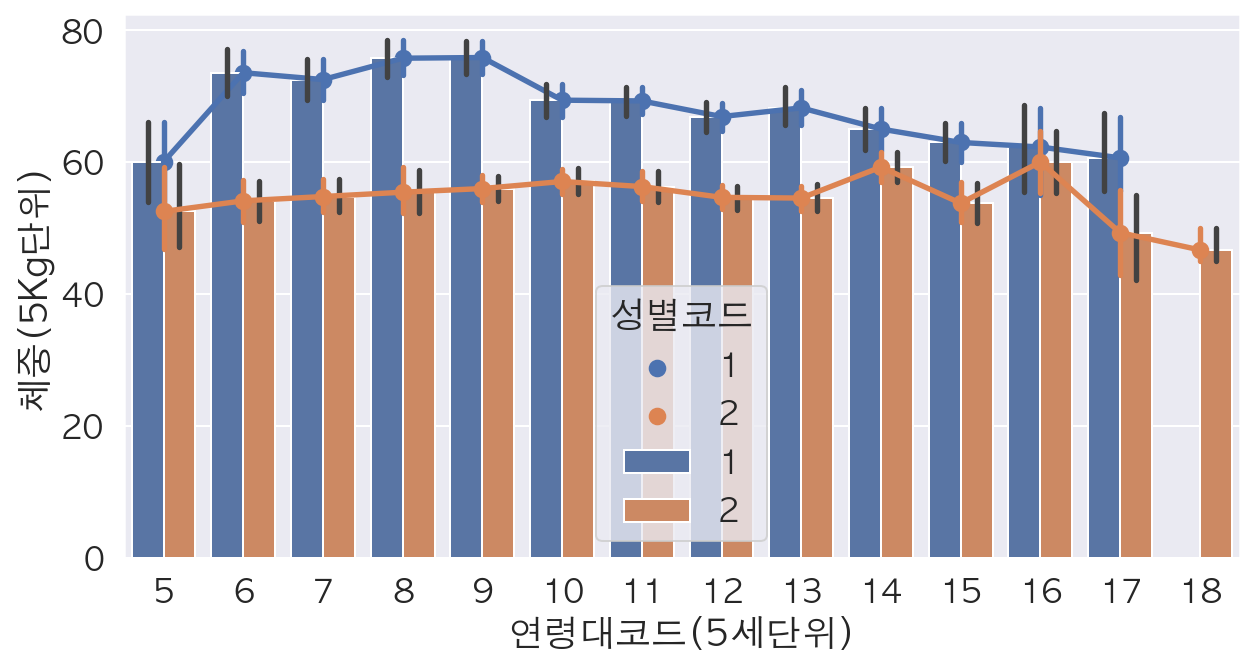

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', ci=95)
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', ci=95)

### boxplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

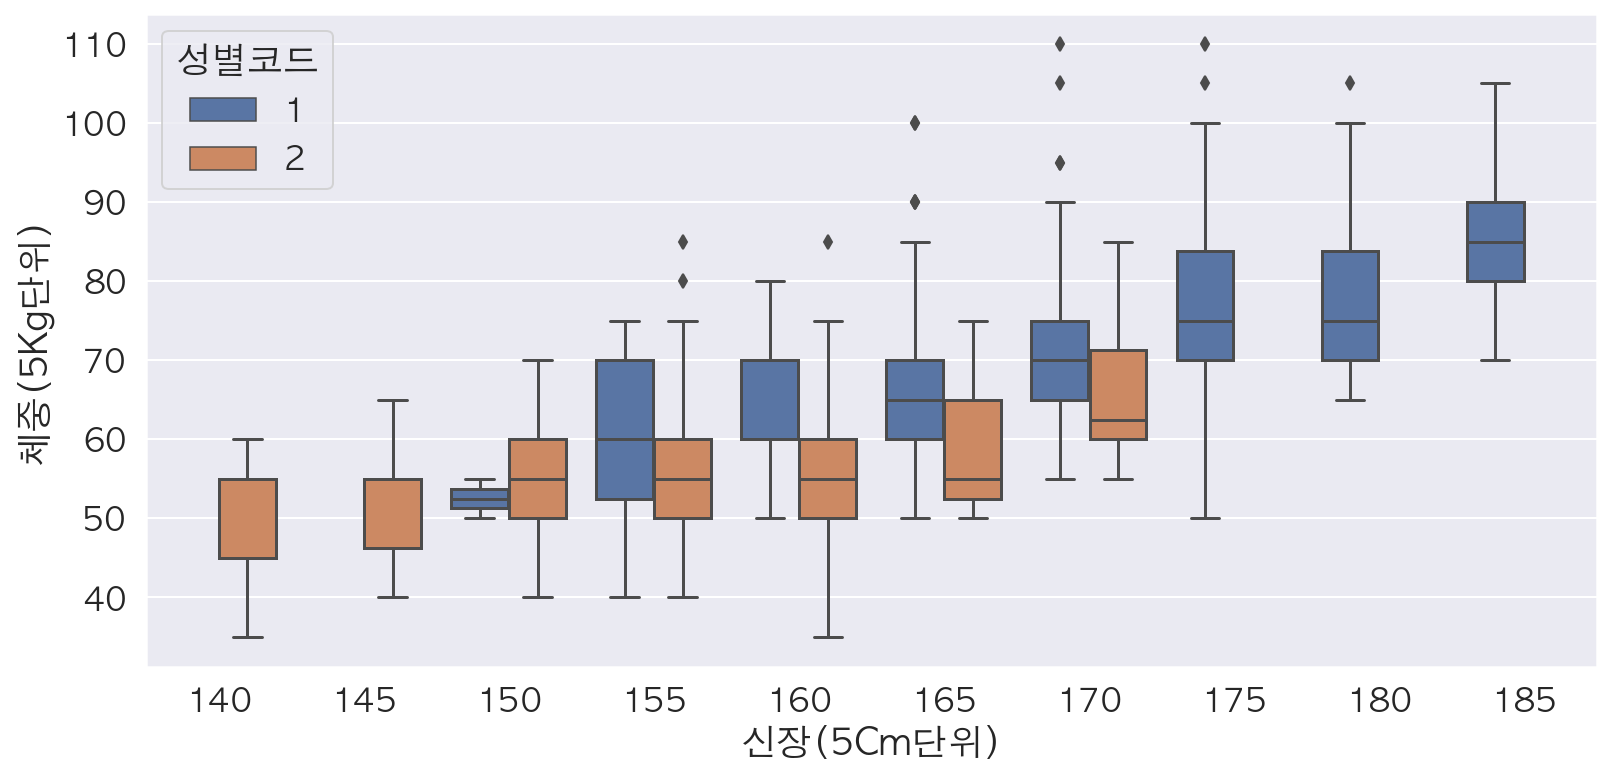

In [109]:
plt.figure(figsize=(13,6))
sns.boxplot(data=df_sample,x='신장(5Cm단위)',y='체중(5Kg단위)',hue='성별코드')

### violineplot

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

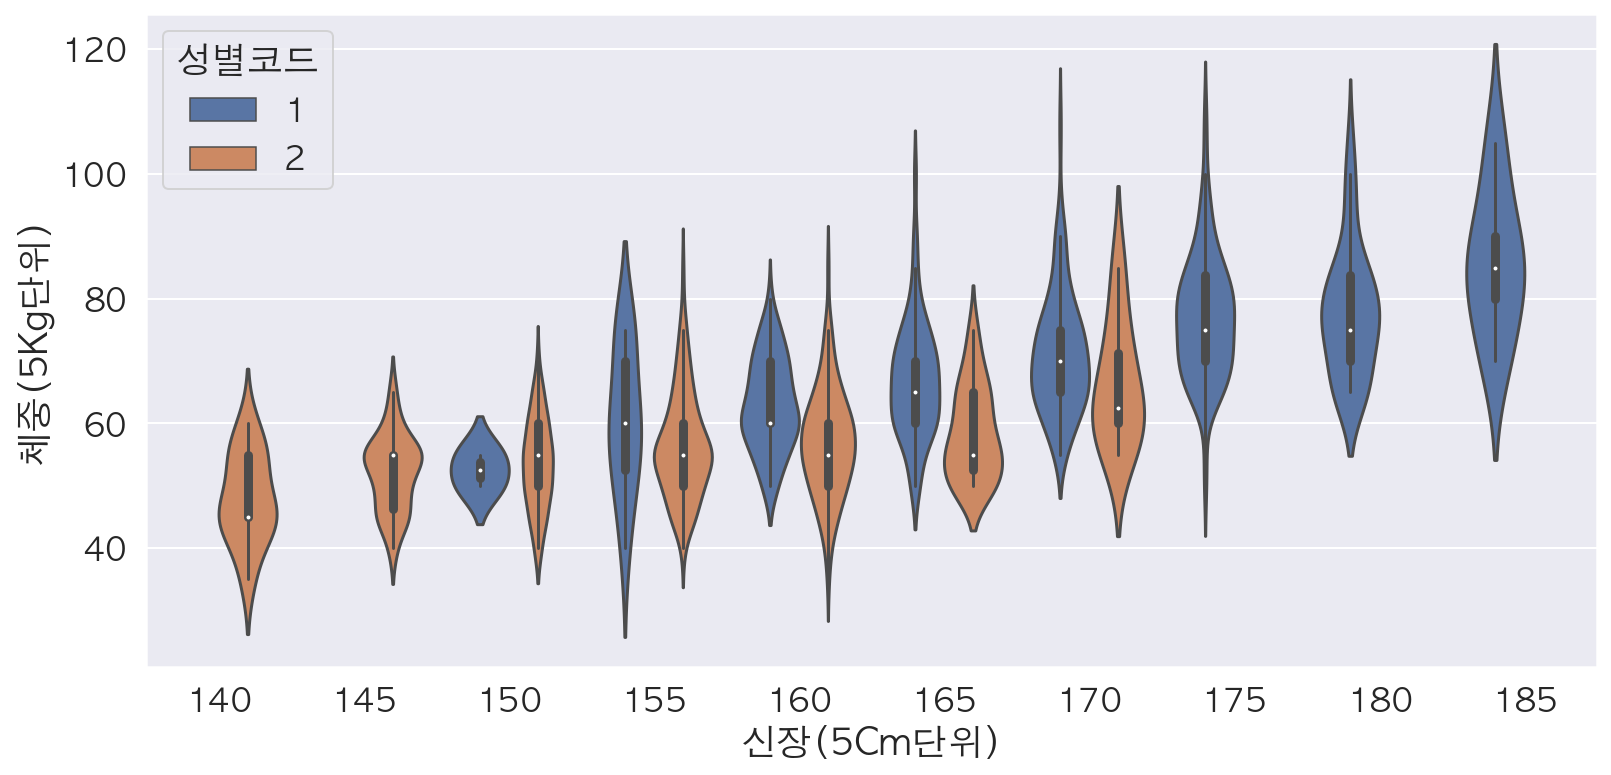

In [111]:
plt.figure(figsize=(13,6))
sns.violinplot(data=df_sample, x='신장(5Cm단위)',y='체중(5Kg단위)',hue='성별코드')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

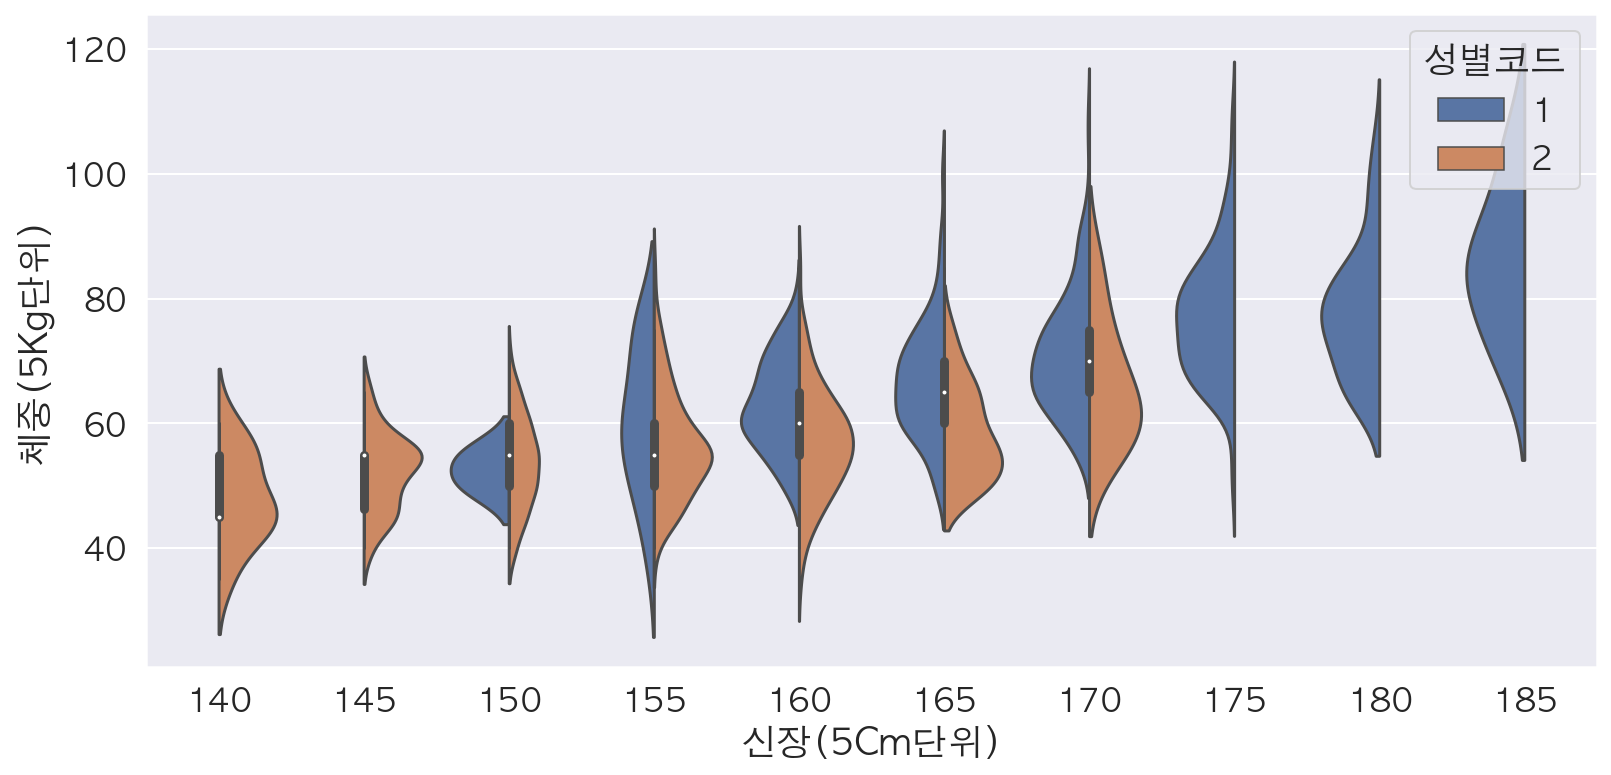

In [113]:
plt.figure(figsize=(13,6))
sns.violinplot(data=df_sample, x='신장(5Cm단위)',y='체중(5Kg단위)',hue='성별코드',split=True)

### Swarmplot

/Users/hana/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/hana/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hana/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hana/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hana/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 55.1% of

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

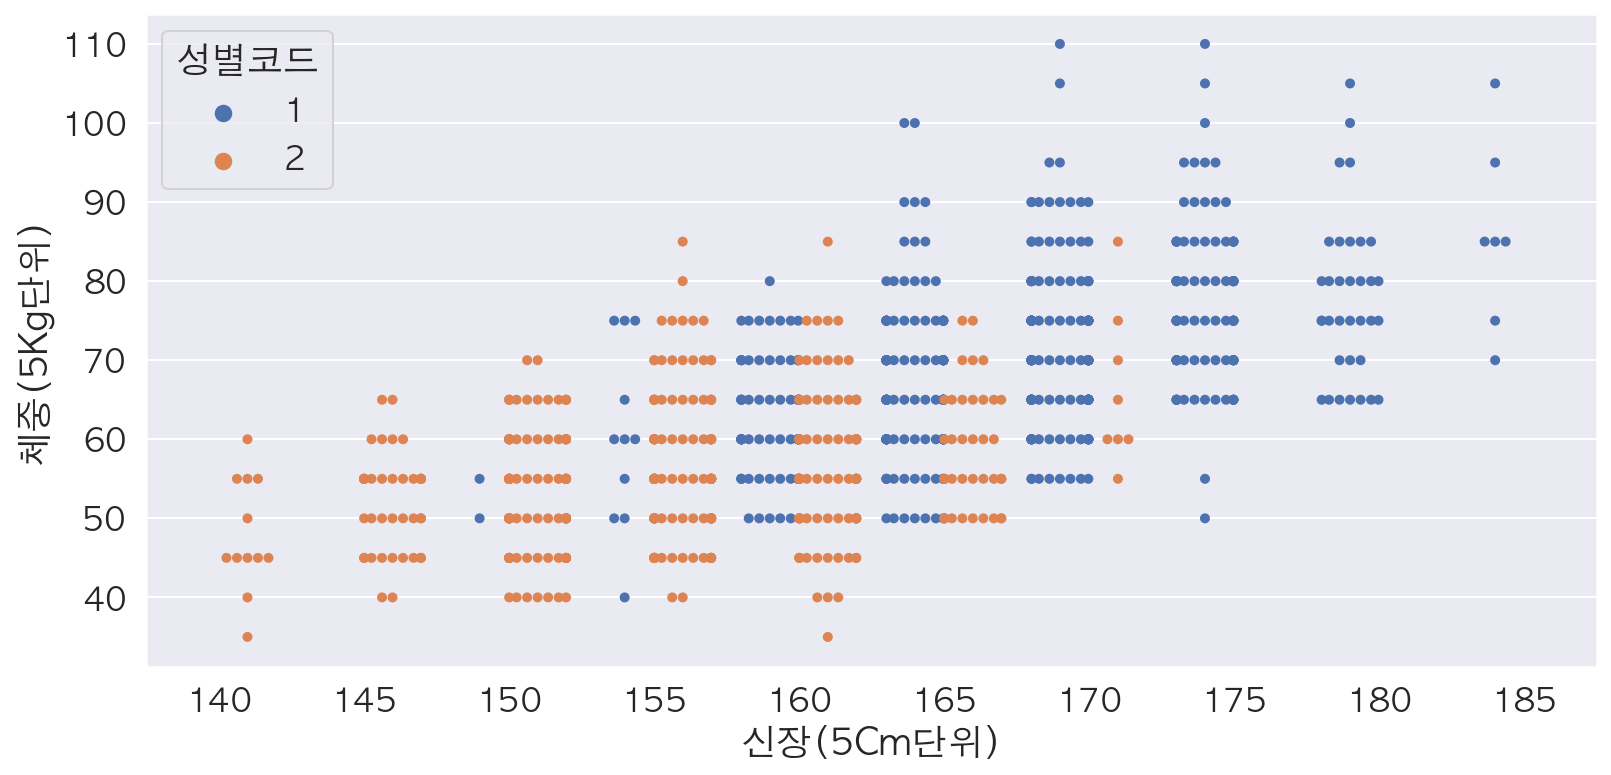

In [114]:
plt.figure(figsize=(13,6))
sns.swarmplot(data=df_sample, x='신장(5Cm단위)',y='체중(5Kg단위)',hue='성별코드',split=True)

### lmplot
- 회귀선 확인가능

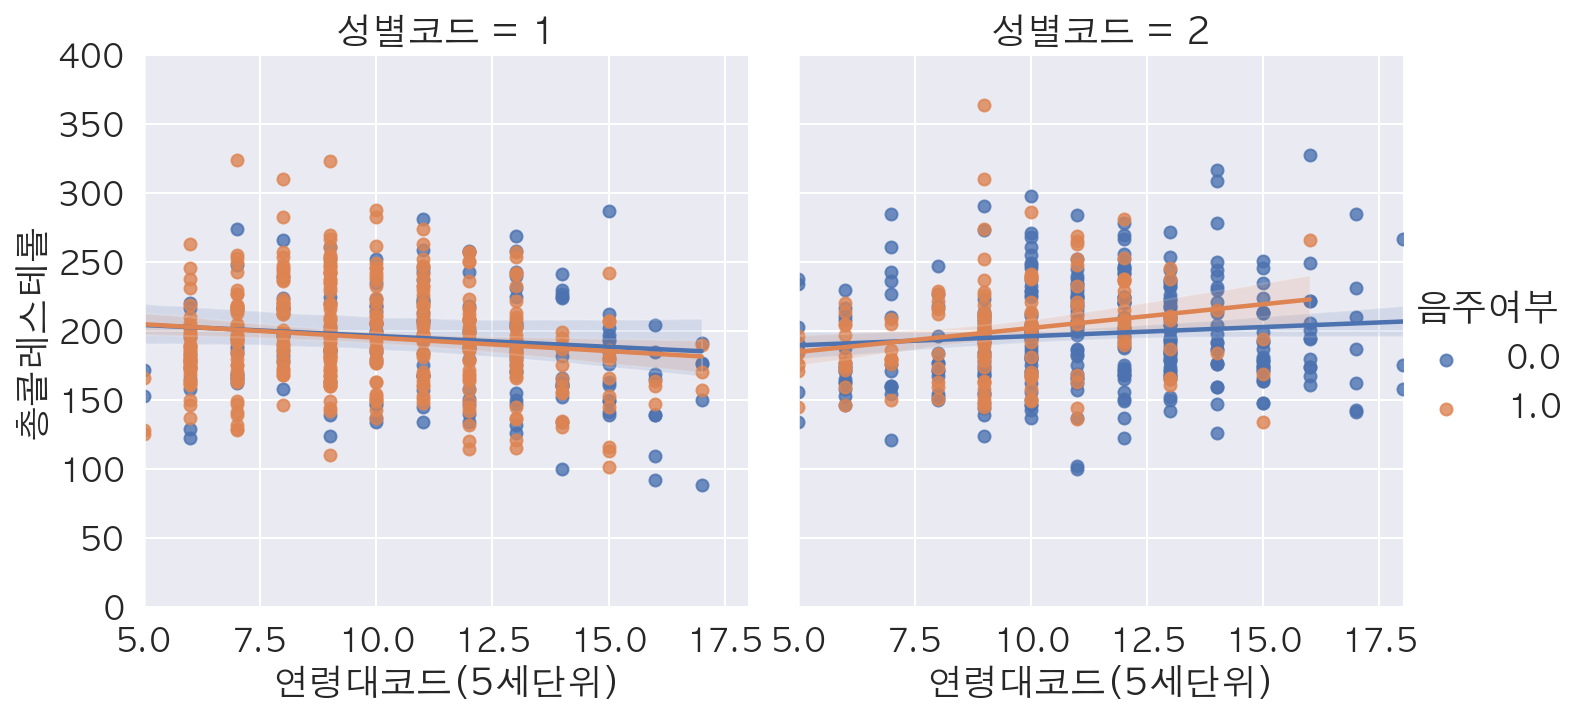

In [127]:
g=sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤',hue='음주여부',col='성별코드')
g.set(ylim=(0,400)) #아웃라이어 제거

## 수치형 데이터 시각화
### scatterplot

[(0.0, 500.0)]

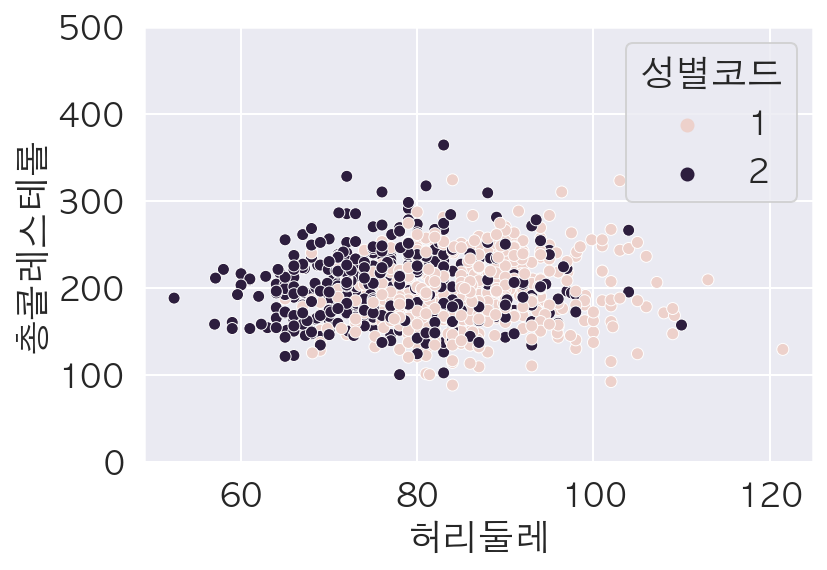

In [131]:
g=sns.scatterplot(data=df_sample, x="허리둘레", y='총콜레스테롤',hue='성별코드')
g.set(ylim=(0,500))

In [128]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [135]:
plt.figure(figsize=(13,6))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y='(혈청지오티)ALT',hue='성별코드'
                , size='체중(5Kg단위)')

<AxesSubplot:xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

### lmplot

In [137]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)',hue='성별코드',col='음주여부')

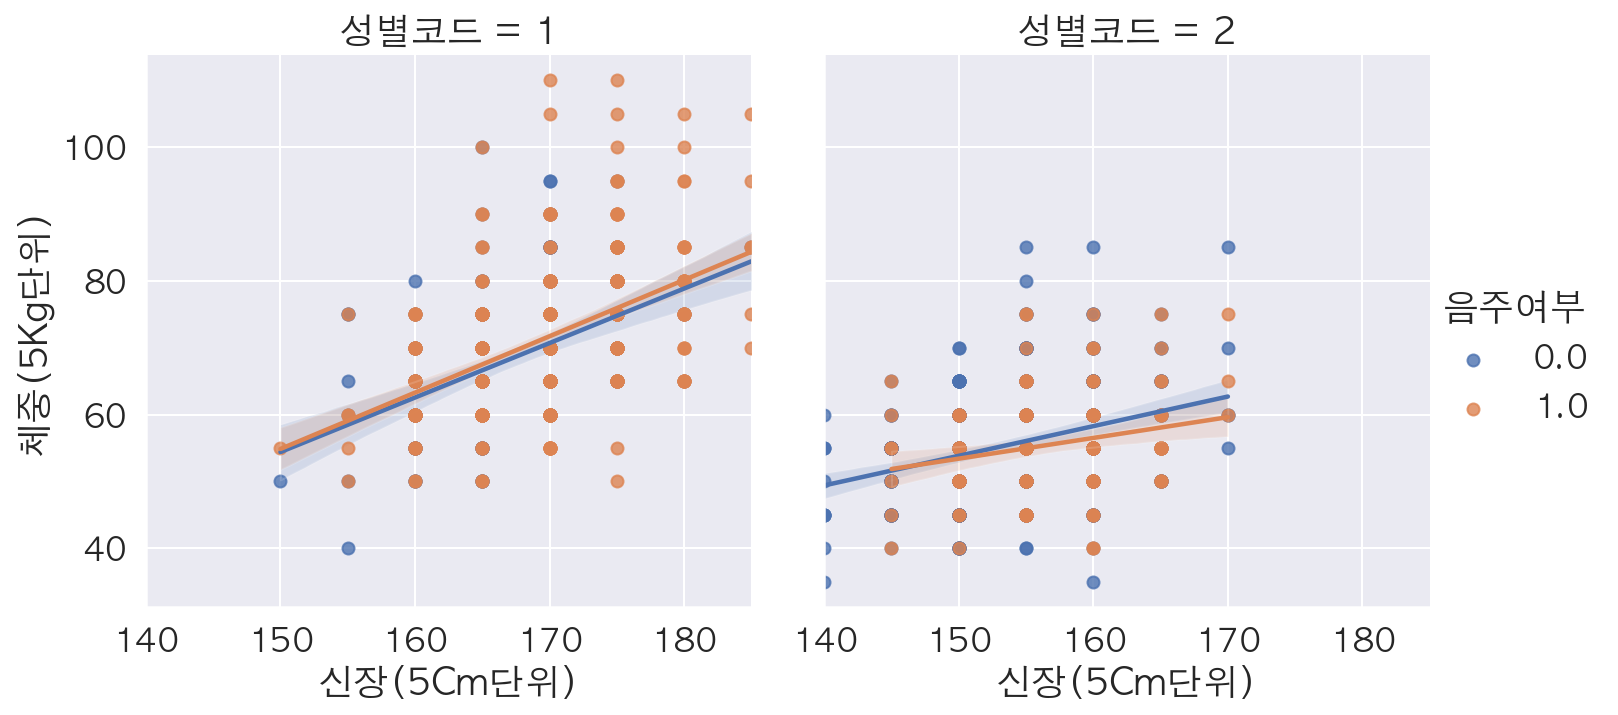

In [138]:
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)',hue='음주여부',col='성별코드')

In [140]:
sns.lmplot(data=df_sample, x='수축기혈압', y='이완기혈압', hue='음주여부',col='성별코드',robust=True)

In [141]:
sns.lmplot(data=df_sample, x='수축기혈압', y='이완기혈압', hue='음주여부',col='성별코드')

### 이상치 다루기

In [151]:
df_100=df_sample[(df_sample["(혈청지오티)AST"] < 100) & (df_sample["(혈청지오티)ALT"] < 100)]

In [152]:
sns.lmplot(data=df_100 , x="(혈청지오티)AST" , y="(혈청지오티)ALT" ,hue='음주여부' , ci=None)

### displot

In [170]:
df_sample.drop(df_sample[df_sample['식전혈당(공복혈당)'].isnull()].index,inplace=True)

/Users/hana/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hana/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='총콜레스테롤', ylabel='Density'>

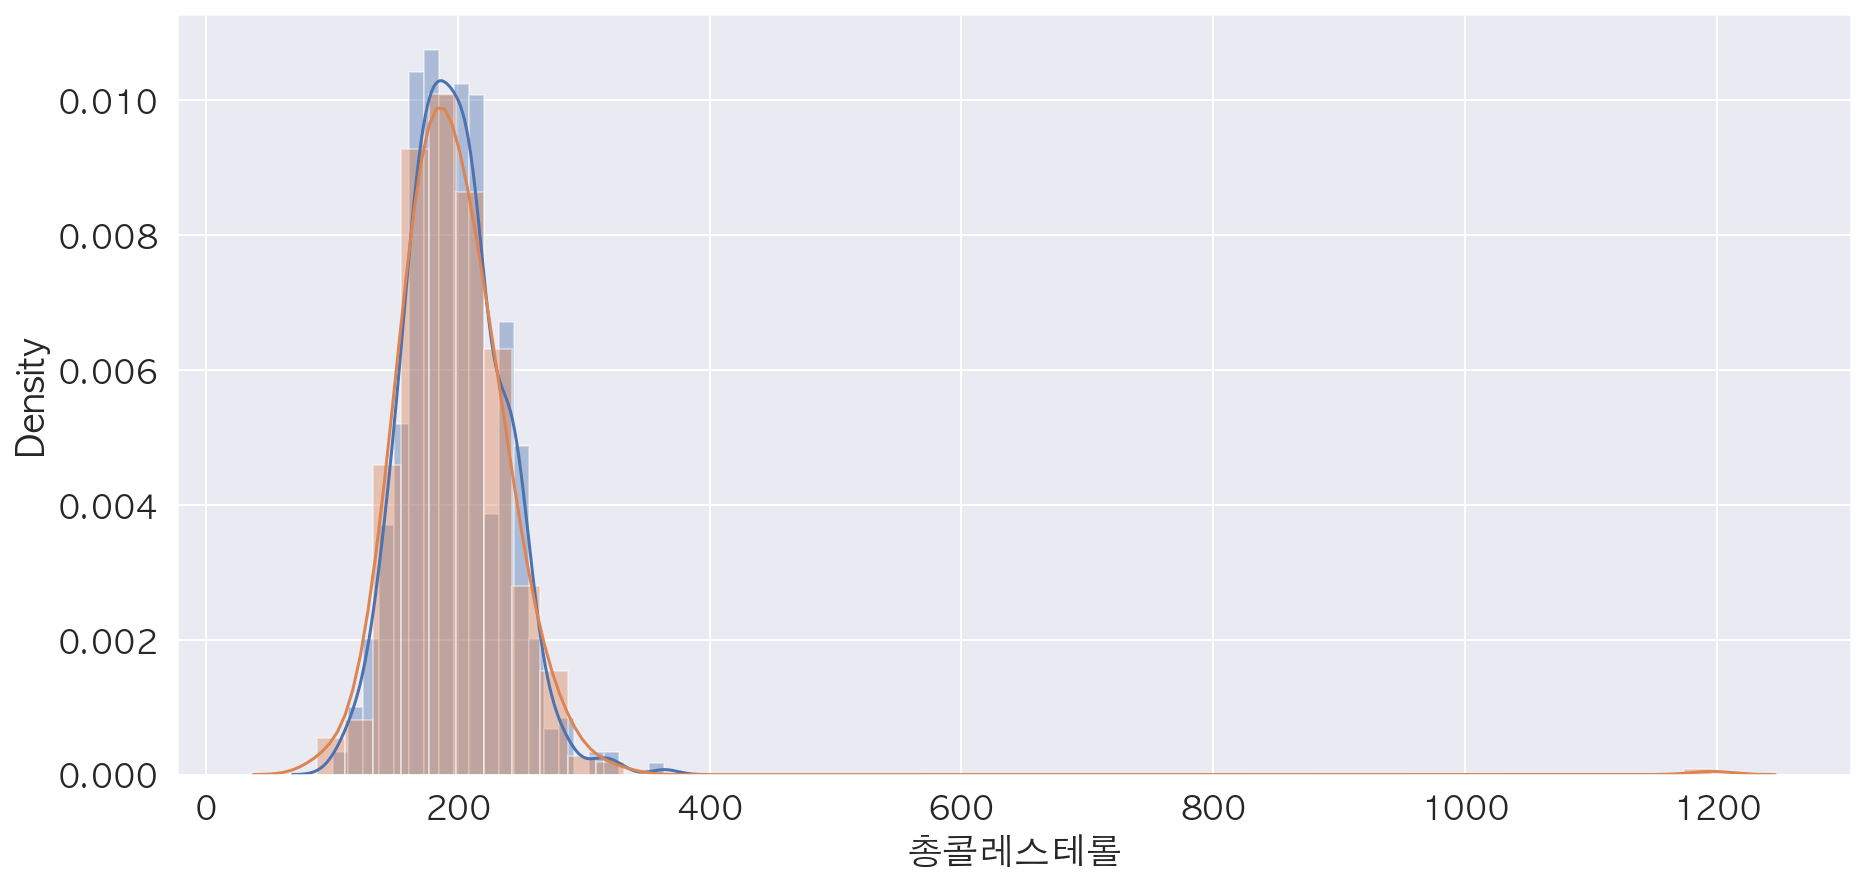

In [178]:
plt.figure(figsize = (15,7))
sns.distplot(df_sample.loc[df_sample['음주여부']==1,'총콜레스테롤'],label = '음주중')
sns.distplot(df_sample.loc[df_sample['음주여부']==0,'총콜레스테롤'], label = '음주안함')



### 상관분석

In [181]:
df_sample.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [183]:
colum_list=['성별코드','연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부']
df_corr=df_sample[colum_list].corr()
df_corr

성별코드  연령대코드(5세단위)      시도코드  신장(5Cm단위)  체중(5Kg단위)      허리둘레  \
성별코드         1.000000     0.095623 -0.037307  -0.746721  -0.604126 -0.431685   
연령대코드(5세단위)  0.095623     1.000000 -0.004142  -0.380314  -0.200363  0.159757   
시도코드        -0.037307    -0.004142  1.000000   0.013526   0.009454 -0.000267   
신장(5Cm단위)   -0.746721    -0.380314  0.013526   1.000000   0.665064  0.312174   
체중(5Kg단위)   -0.604126    -0.200363  0.009454   0.665064   1.000000  0.785951   
허리둘레        -0.431685     0.159757 -0.000267   0.312174   0.785951  1.000000   
시력(좌)       -0.168271    -0.217624  0.036039   0.202423   0.122190  0.017344   
시력(우)       -0.211332    -0.308851 -0.006868   0.236245   0.168920  0.030785   
청력(좌)       -0.019301     0.234003  0.029290  -0.063991  -0.043704  0.050701   
청력(우)       -0.004417     0.264591 -0.017901  -0.074688  -0.047695  0.073141   
수축기혈압       -0.180585     0.222439  0.037385   0.063975   0.289006  0.349276   
이완기혈압       -0.229366     0.091153  0.039390   0.158061   0.324952  0.329542   
식전혈당(공복혈당)  -0.107628     0.215097  0.023215   0.005997   0.164926  0.235417   
총콜레스테롤       0.035714    -0.008847  0.017103  -0.004133   0.050713  0.036389   
트리글리세라이드    -0.183028     0.037474  0.024771   0.135087   0.260689  0.267643   
HDL콜레스테롤     0.333060    -0.095972 -0.110483  -0.207537  -0.330577 -0.311478   
LDL콜레스테롤    -0.003315     0.008560  0.046834   0.008146   0.043839  0.017287   
혈색소         -0.665420    -0.178977  0.013586   0.541155   0.540191  0.377673   
요단백         -0.050040     0.058702 -0.009841  -0.007699   0.012154  0.045948   
혈청크레아티닌     -0.322770     0.044958  0.028772   0.212811   0.170468  0.131421   
(혈청지오티)AST  -0.196303     0.129357 -0.031223   0.055783   0.193976  0.253549   
(혈청지오티)ALT  -0.262922    -0.009871 -0.032959   0.159199   0.401756  0.407063   
감마지티피       -0.249141    -0.015357  0.012384   0.185091   0.246924  0.234831   
흡연상태        -0.609435    -0.121034  0.048318   0.512685   0.393085  0.246585   
음주여부        -0.374419    -0.275606 -0.011317   0.410874   0.290229  0.134686   

                시력(좌)     시력(우)     청력(좌)     청력(우)  ...  HDL콜레스테롤  LDL콜레스테롤  \
성별코드        -0.168271 -0.211332 -0.019301 -0.004417  ...  0.333060 -0.003315   
연령대코드(5세단위) -0.217624 -0.308851  0.234003  0.264591  ... -0.095972  0.008560   
시도코드         0.036039 -0.006868  0.029290 -0.017901  ... -0.110483  0.046834   
신장(5Cm단위)    0.202423  0.236245 -0.063991 -0.074688  ... -0.207537  0.008146   
체중(5Kg단위)    0.122190  0.168920 -0.043704 -0.047695  ... -0.330577  0.043839   
허리둘레         0.017344  0.030785  0.050701  0.073141  ... -0.311478  0.017287   
시력(좌)        1.000000  0.346263 -0.039492 -0.080994  ... -0.045579 -0.052768   
시력(우)        0.346263  1.000000 -0.072102 -0.102866  ... -0.068572  0.003336   
청력(좌)       -0.039492 -0.072102  1.000000  0.565279  ... -0.047898  0.006018   
청력(우)       -0.080994 -0.102866  0.565279  1.000000  ... -0.069527 -0.032362   
수축기혈압       -0.012882 -0.036382  0.039088  0.056636  ... -0.093036 -0.007070   
이완기혈압        0.027889  0.001346 -0.015665 -0.005789  ... -0.091701  0.038887   
식전혈당(공복혈당)  -0.041152 -0.043653  0.012104  0.069277  ... -0.132477  0.043905   
총콜레스테롤      -0.052320  0.016831  0.008247 -0.047907  ...  0.025190  0.861641   
트리글리세라이드     0.032493  0.070753  0.018695  0.034650  ... -0.312560  0.064503   
HDL콜레스테롤    -0.045579 -0.068572 -0.047898 -0.069527  ...  1.000000 -0.162307   
LDL콜레스테롤    -0.052768  0.003336  0.006018 -0.032362  ... -0.162307  1.000000   
혈색소          0.142582  0.190303 -0.000433 -0.050208  ... -0.252492  0.068631   
요단백         -0.024741 -0.024977  0.041231  0.081749  ... -0.058606  0.092367   
혈청크레아티닌      0.022175  0.080797  0.016792  0.017758  ... -0.141626 -0.013668   
(혈청지오티)AST   0.011212  0.003236  0.020671 -0.004681  ... -0.060252 -0.011918   
(혈청지오티)ALT   0.080793  0.123455  0.044048 -0.019893  ... -0.169802  0.022981   
감마지티피        0.111903  0.035304 -0.025004 -0.024936  ... -0.067822  0.007599   
흡연상태         0.1

In [186]:
df_corr['음주여부'].sort_values(ascending=False)

음주여부           1.000000
신장(5Cm단위)      0.410874
흡연상태           0.345315
혈색소            0.312005
체중(5Kg단위)      0.290229
감마지티피          0.206864
시력(우)          0.158668
(혈청지오티)ALT     0.138756
허리둘레           0.134686
트리글리세라이드       0.134188
(혈청지오티)AST     0.125927
이완기혈압          0.109459
시력(좌)          0.081130
혈청크레아티닌        0.069982
수축기혈압          0.042539
식전혈당(공복혈당)     0.022550
총콜레스테롤         0.002317
시도코드          -0.011317
HDL콜레스테롤      -0.016938
요단백           -0.018333
LDL콜레스테롤      -0.023031
청력(좌)         -0.053127
청력(우)         -0.072256
연령대코드(5세단위)   -0.275606
성별코드          -0.374419
Name: 음주여부, dtype: float64

In [187]:
df_corr['흡연상태'].sort_values(ascending=False)

흡연상태           1.000000
신장(5Cm단위)      0.512685
혈색소            0.434467
체중(5Kg단위)      0.393085
음주여부           0.345315
허리둘레           0.246585
감마지티피          0.180186
(혈청지오티)ALT     0.168947
트리글리세라이드       0.154560
혈청크레아티닌        0.151747
이완기혈압          0.144524
시력(좌)          0.141512
수축기혈압          0.094063
요단백            0.092105
시력(우)          0.089580
(혈청지오티)AST     0.081326
식전혈당(공복혈당)     0.074190
시도코드           0.048318
LDL콜레스테롤       0.025842
청력(좌)          0.007270
총콜레스테롤         0.001728
청력(우)         -0.042311
연령대코드(5세단위)   -0.121034
HDL콜레스테롤      -0.213555
성별코드          -0.609435
Name: 흡연상태, dtype: float64

### heatmap

<AxesSubplot:>

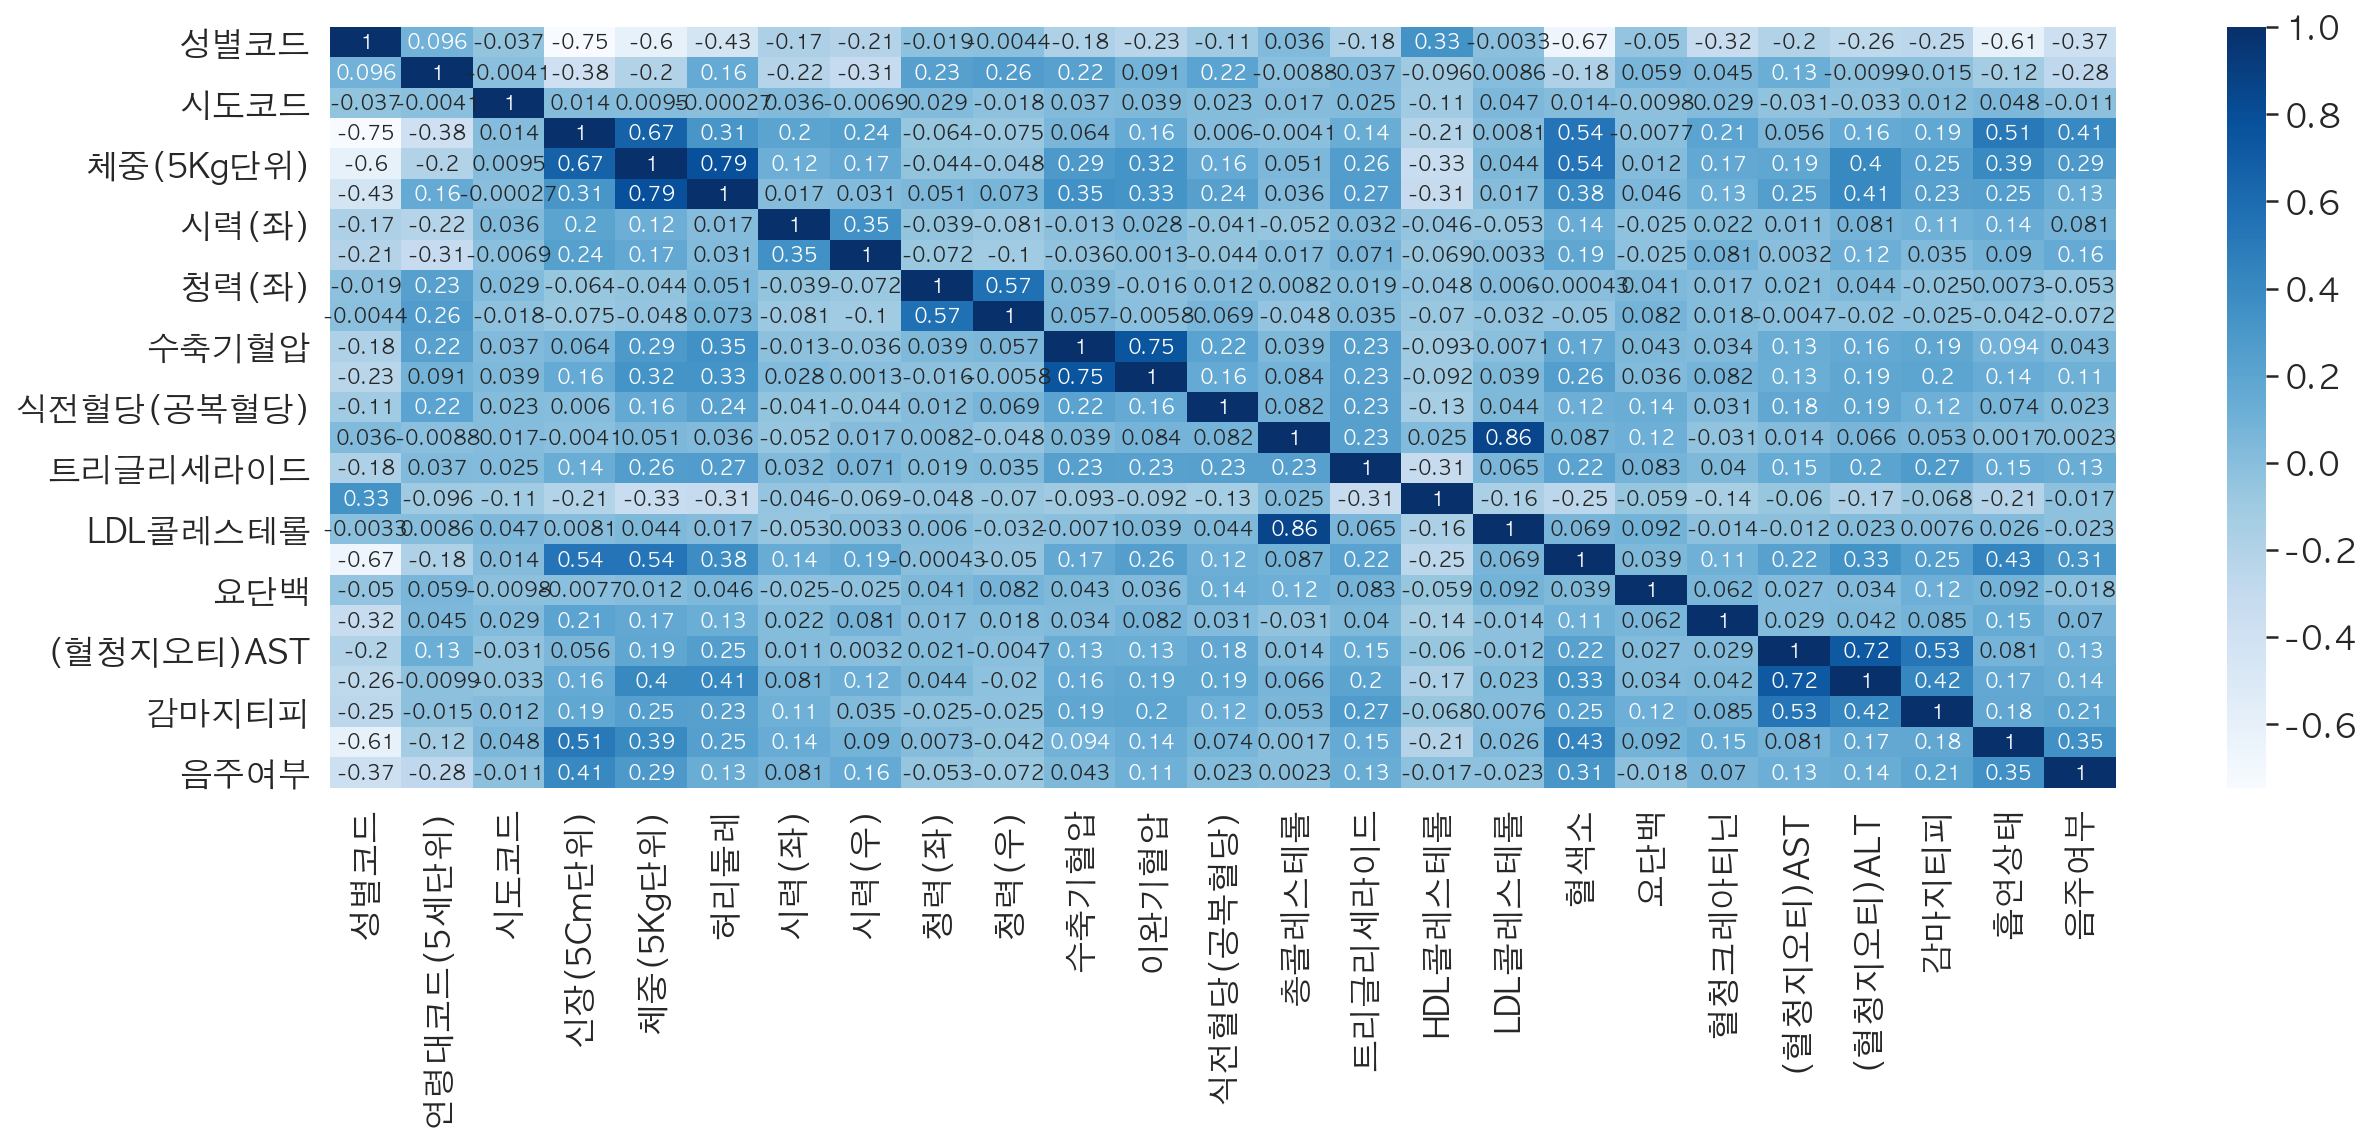

In [197]:
plt.figure(figsize=(20,7))
plt.rc('font',size=10)
sns.heatmap(df_corr, annot=True,cmap='Blues')